# **Dataset Information**

The dataset was found on Kaggle

`Link`: https://www.kaggle.com/datasets/parulpandey/emotion-dataset/code

`Dataset Information`: About the Dataset

The dataset comprises English Twitter messages annotated with five basic emotions: **anger**, **fear**, **joy**, **love** and **sadness**. The data was collected using hashtags to identify tweets corresponding to eight basic emotions, including **anger**, **anticipation**, **disgust**, **fear**, **joy**, **sadness**, **surprise**, and **trust**. However, the current dataset focuses on a subset of these emotions. 

The dataset aims to capture linguistic nuances associated with emotion expression in text. 

**Key Details:**
- **Homepage:** [GitHub Repository](https://github.com/dair-ai/emotion_dataset)
- **Paper:** [CARER: Contextualized Affect Representations for Emotion Recognition](https://www.aclweb.org/anthology/D18-1404)
- **Size:** 
  - Downloaded files: 3.95 MB
  - Generated dataset: 4.16 MB
  - Total disk usage: 8.11 MB
- **Contact:** ellfae@gmail.com

**Example Data:**
```json
{
   "label": 0,
   "text": "im feeling quite sad and sorry for myself but ill snap out of it soon"
}
```

**Acknowledgments:**
The dataset is credited to the work of **Elvis Saravia**, **Hsien-Chi Toby Liu**, **Yen-Hao Huang**, **Junlin Wu**, and **Yi-Shin Chen**, as outlined in the paper presented at the 2018 Conference on Empirical Methods in Natural Language Processing. Their work proposed advanced methods to model nuanced linguistic patterns for emotion recognition, leveraging semi-supervised and graph-based algorithms enriched with word embeddings. 

This dataset is ideal for text-based emotion recognition tasks, providing a robust foundation for understanding affective expressions in text.

label encoding was provided in this manner:
**A classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4).**

# **Proposed Use Case: Sentiment Analysis for Mental Health Monitoring**

### Use Case Overview:
This dataset can be used to develop a **text classification system** that monitors users' emotional states through their social media activity, particularly on platforms like Twitter. By analyzing tweets, the system can detect emotions such as **anger**, **fear**, **joy**, **sadness**, and others, providing valuable insights on the user's mental health trends.

### Key Features:
1. **Emotion Recognition:** Classifying tweets into predefined emotion categories such as sadness, joy or anger.
   
2. **Behavioral Trends Analysis:** Track emotional changes over time to identify patterns and even anomalies.

### Relevant Scenarios:
- **Mental Health Support:** Helping individuals with mental health challenges by identifying negative emotional patterns in their social media posts.
- **Customer Feedback Analysis:** Analyzing customer tweets to assess sentiment towards brands or services.
- **Education and Counseling:** Using the emotion classifier to provide personalized recommendations to students or clients in therapy based on their emotional expressions.
- **Disaster Response:** Identifying emotions like fear or sadness during crises to prioritize aid and support in affected areas.

### Why This Use Case?
Emotion classification from text is a growing field with real-world applications that extends beyond sentiment analysis. Leveraging this enables the development of impactful systems that can improve well-being, enhance customer experiences, and contribute to social good.

# **Data Loading and Exploration**

In [2]:
# Importing Pandas to do data exploration and manipulation
import pandas as pd

# Path to the uploaded file
file_path = 'training.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Displaying the first few rows
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [3]:
# Print the information of the dataset and get a rough gauge of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [4]:
# Check if there are any rows with empty values
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
# Check if there are any duplicated rows in the dataset
df.duplicated().sum()

1

In [6]:
# Check the variety of data in the dataset
df.sample(5)

text  label
6926   i suggest before you begin you take some time ...      1
6782   i feel like i lived with the characters and fe...      0
12718  im left with today is feeling anxious and sad ...      4
15866  i am feeling much more like myself but experie...      4
4794   when i saw all the starving people in ethiopia...      3

# **Label Mapping**

To make the labels more descriptive and human-readable. The labels were provided in the kaggle dataset information section.

In [8]:
# Define the mapping of labels with link to
label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear'}

# Apply the mapping to the 'label' column
df['label'] = df['label'].map(label_mapping)

In [9]:
# To see how the data has been manipulated after applying label mapping
df.sample(5)

text label
3763   i reached the halfway point of the climb and m...   joy
9602   i feel really pumped and also am eager to try ...   joy
14111  i only watch about television shows regularly ...   joy
3116   i find calming about these colors i dunno i gu...   joy
14961        i wondered if that should make me feel cool   joy

In [10]:
# Importing required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Check the dataset structure and data types
print("Dataset Structure and Data Types:")
print(df.dtypes)


Dataset Structure and Data Types:
text     object
label    object
dtype: object


### **Visualization for Label Mapping** 

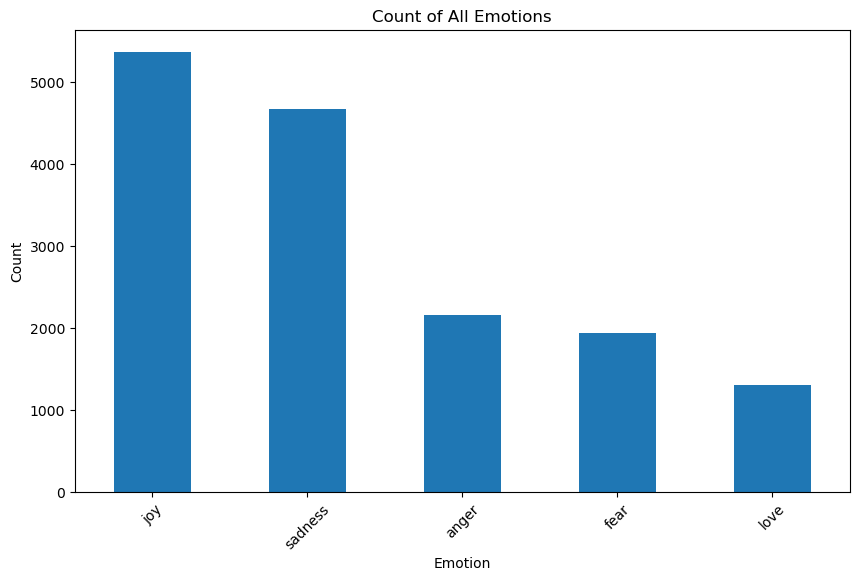

In [12]:
# Plotting the count of all emotions in dataset after label mapping
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Count of All Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Cleaning and Label Balancing**
Removing the 'love' label to achieve a balanced dataset and verifying updated counts

In [14]:
# Remove rows where the label is 'love' since it is too less and causes the dataset to not be well-balanced
df = df[df['label'] != 'love']

# Verify if 'love' is completely removed from all the labels
label_counts_after_removal = df['label'].value_counts()

# Display the updated label counts
label_counts_after_removal

label
joy        5362
sadness    4666
anger      2159
fear       1937
Name: count, dtype: int64

# **Visualizing Label Distribution**
Plotting emotions after removing 'love' to verify improved distribution

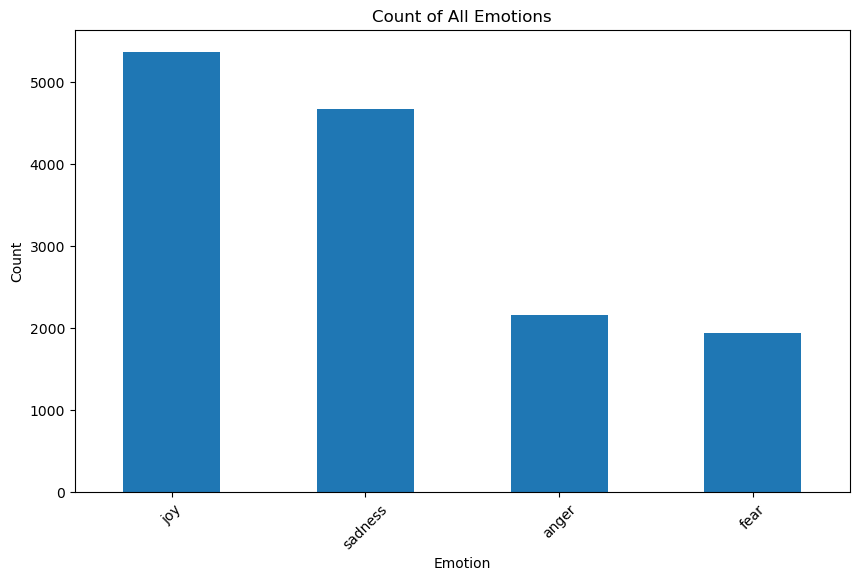

In [16]:
# Plotting the count of all emotions after removing love and checking if it is more well distributed
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Count of All Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Word Frequency Analysis**
Tokenizes text data from the text column, converts words to lowercase, filters out non-alphanumeric tokens, and calculates word frequencies using Counter. It then visualizes the top 20 most common words in the text, providing insights into frequently occurring terms within the dataset.

[nltk_data] Downloading package punkt to /Users/moanish18/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/1v/pl1p5c2x63nbm8rgmv8knxj00000gn/T/ipykernel_6093/4133515182.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


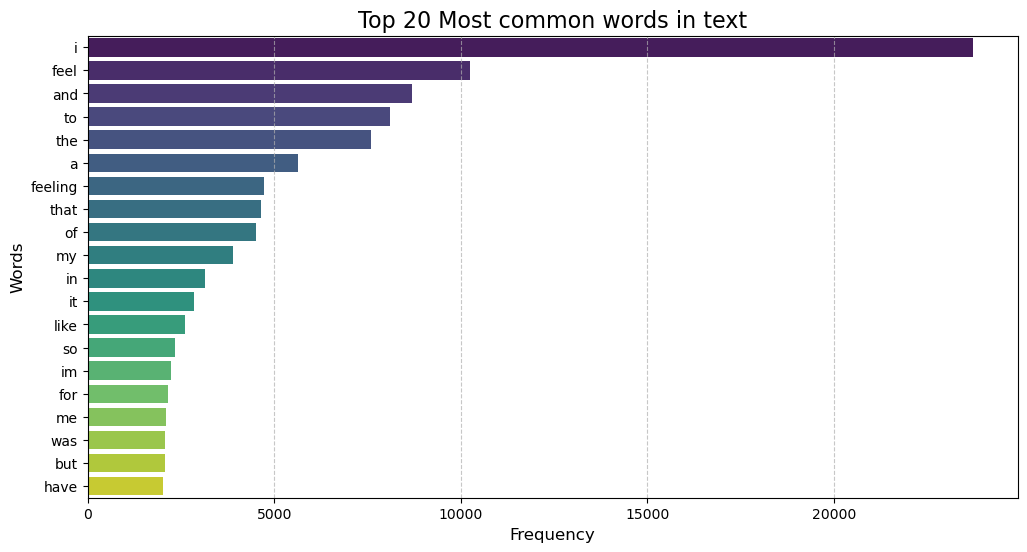

In [18]:
# Importing the required libraries to do tokenization and use 'Counter' to calculate the occurrences of each word
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download necessary NLTK data files (if not already downloaded)
nltk.download('punkt')

# Check if the 'text' column is present to prevent any unwanted errors
if 'text' in df.columns:
    # All the words in the column 'text' get converted to Lower cased letters and tokenized
    # if the word is either alphabetic or numeric
    all_words = [
        word.lower() for text in df['text']
        for word in word_tokenize(str(text))
        if word.isalnum()
    ]

    # Count word frequencies from tokenized content
    word_freq = Counter(all_words)

    # Extract the top 20 most common words
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)

    # Plot the top 20 most commond words in the text
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title("Top 20 Most common words in text", fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Error: 'text' column not found in the DataFrame.")

### **Word Cloud Visualization**
Visually represents the most frequent words in the dataset for quick insights.

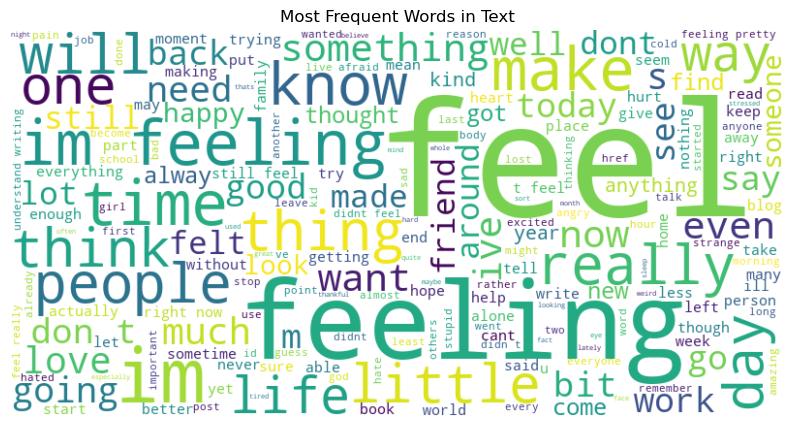

In [20]:
# Import 'wordcloud' module to show the most common words as a wordcloud visualization
from wordcloud import WordCloud

# Most frequent words shown in word cloud format

# Check if the text column is present in the dataframe to prevent unwanted errors
if 'text' in df.columns:
    # Concatenate all text data from the 'text' column into a single string
    text_data = ' '.join(df['text'].astype(str))

    # Generate a word cloud from the concatenated text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Display the generated word cloud image with bilinear interpolation for smoothing
    plt.imshow(wordcloud, interpolation='bilinear')

    # Remove axes for better visualization of the word cloud
    plt.axis('off')

    # Add a title to the word cloud plot
    plt.title('Most Frequent Words in Text')

    # Display the plot
    plt.show()
else:
    wordcloud = "No text column available for WordCloud generation"

### **Emotion Distribution Analysis**
Calculates and displays the percentage distribution of emotions for better understanding of the dataset balance.

In [22]:
# Calculate the distribution of the emotions in percentage
sentiment_distribution = (df['label'].value_counts(normalize=True) * 100).round(2)

# Display the distribution
sentiment_distribution

label
joy        37.96
sadness    33.04
anger      15.29
fear       13.71
Name: proportion, dtype: float64

### **Word Count Distribution Analysis**

Analyze and visualize the distribution of word counts in the text data for understanding content length variations.

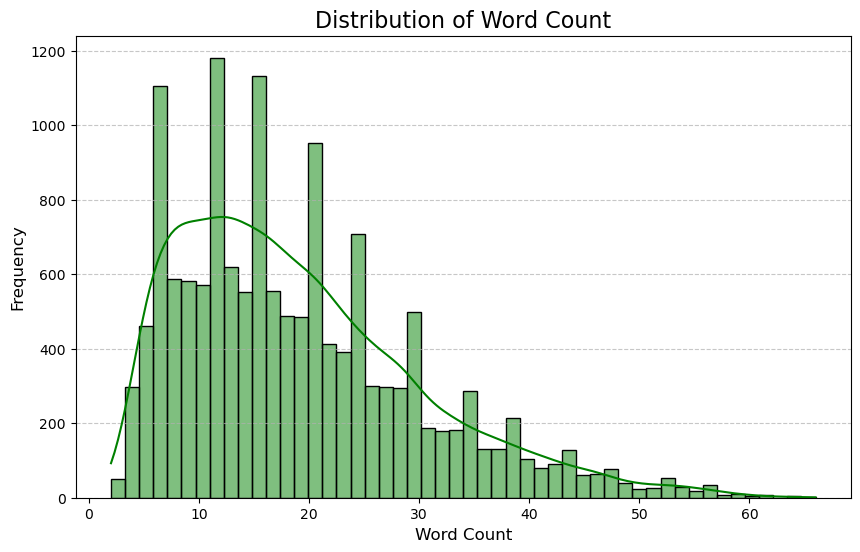

In [24]:
# Check if the DataFrame contains a column named 'text'
if 'text' in df.columns:
    # Create a new column 'word_count' by applying a function to calculate the number of words in each text entry
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))

    # Set the figure size for the histogram plot
    plt.figure(figsize=(10, 6))

    # Plot a histogram for the 'word_count' column with 50 bins, a KDE curve, and a green color for the bars
    sns.histplot(df['word_count'], bins=50, kde=True, color='green')

    # Set the title of the histogram plot with a font size of 16
    plt.title('Distribution of Word Count', fontsize=16)

    # Label the x-axis as 'Word Count' with a font size of 12
    plt.xlabel('Word Count', fontsize=12)

    # Label the y-axis as 'Frequency' with a font size of 12
    plt.ylabel('Frequency', fontsize=12)

    # Add a grid to the y-axis with dashed lines and partial transparency for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


### **Outlier Removal and Text Length Analysis**

Remove outliers in text length using the 99th percentile and analyse the distribution in text length across different emotions.

99th percentile text length threshold: 263.0


/var/folders/1v/pl1p5c2x63nbm8rgmv8knxj00000gn/T/ipykernel_6093/3507872937.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='label', y='text_length', palette="coolwarm")


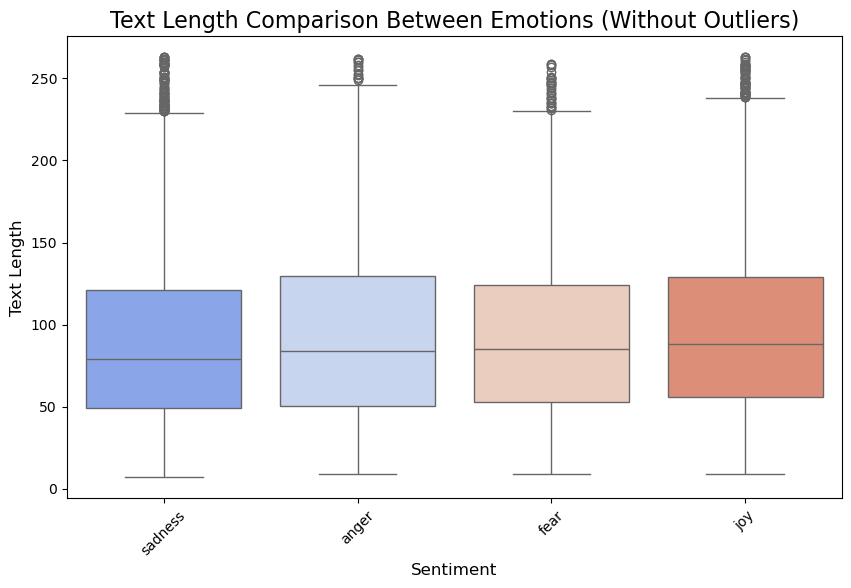

In [26]:
import numpy as np  # Importing the NumPy library for numerical operations

# Recalculating the 'text_length' column based on the 'text' column
if 'text' in df.columns:
    # Calculate the length of each text entry and store it in a new column 'text_length'
    df['text_length'] = df['text'].apply(len)
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text' column not found in the DataFrame.")

# Define a threshold for outlier removal using the 99th percentile
if 'text_length' in df.columns:
    # Calculate the 99th percentile of the 'text_length' column
    text_length_threshold = np.percentile(df['text_length'], 99)
    # Print the calculated threshold value
    print(f"99th percentile text length threshold: {text_length_threshold}")

    # Filter the dataset to include only rows where 'text_length' is below the threshold
    filtered_df = df[df['text_length'] <= text_length_threshold]

    # Replot the boxplot for text length comparison without outliers
    if 'label' in filtered_df.columns:
        # Set the figure size for the boxplot
        plt.figure(figsize=(10, 6))

        # Create a boxplot to compare 'text_length' across different labels or sentiments
        sns.boxplot(data=filtered_df, x='label', y='text_length', palette="coolwarm")

        # Set the title of the plot with a font size of 16
        plt.title('Text Length Comparison Between Emotions (Without Outliers)', fontsize=16)

        # Label the x-axis as 'Sentiment' with a font size of 12
        plt.xlabel('Sentiment', fontsize=12)

        # Label the y-axis as 'Text Length' with a font size of 12
        plt.ylabel('Text Length', fontsize=12)

        # Rotate the x-axis labels by 45 degrees for better readability
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    else:
        # Print an error message if the 'label' column is not found in the filtered DataFrame
        print("Error: 'label' column not found in the DataFrame.")
else:
    # Print an error message if the 'text_length' column is not found after recalculation
    print("Error: 'text_length' column not found after recalculation.")


In [27]:
# Check how the dataframe looks like after adding new columns
df.sample(5)

text    label  word_count  \
13753  i admit i walked into third wave cafe feeling ...     fear          36   
3461   i am just feel so shy cause i realized those p...     fear          21   
14696                   i didnt feel cheated or deprived  sadness           6   
7528   i sat on the plane home feeling more positive ...      joy          24   
11171  i still feel better in my room even though i l...      joy          19   

       text_length  
13753          189  
3461            96  
14696           32  
7528           108  
11171           85

### **Stopword Removal in Text Preprocessing**

Clean the text data by removing common stopwords (from nltk.corpus stopwords package), improving the quality for data analysis and modeling.

In [29]:
import nltk  # Import the NLTK library for natural language processing tasks
from nltk.corpus import stopwords  # Import the stopwords module from NLTK

# Download necessary NLTK data files for stopwords and tokenization
nltk.download('stopwords')  # Download the stopwords dataset
nltk.download('punkt')  # Download the Punkt tokenizer for tokenizing text

# Define a set of English stopwords for filtering
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a given text
def remove_stopwords(text):
    # Tokenize the text into individual words
    words = word_tokenize(text)

    # Filter out words that are stopwords (case-insensitive) and keep the rest
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a single string and return it
    return ' '.join(filtered_words)

# Apply the 'remove_stopwords' function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(remove_stopwords)

# Display the first few rows of the DataFrame to confirm the changes
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moanish18/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/moanish18/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text    label  word_count  \
0                              didnt feel humiliated  sadness           4   
1  go feeling hopeless damned hopeful around some...  sadness          21   
2          im grabbing minute post feel greedy wrong    anger          10   
4                                    feeling grouchy    anger           4   
5      ive feeling little burdened lately wasnt sure  sadness          12   

   text_length  
0           23  
1          108  
2           48  
4           20  
5           65

### **Advanced Text Preprocessing and Word Frequency Analysis**

Efficiently clean and tokenize text data using custom stopwords, removing context-irrelevant words and identify the top 20 most frequent words for deeper insights.

In [31]:
import pandas as pd  # Import pandas for data manipulation
from nltk.tokenize import word_tokenize  # Import word tokenizer from NLTK
from collections import Counter  # Import Counter to count word frequencies
import nltk  # Import NLTK for natural language processing
import re  # Import regular expressions for text cleaning

# Ensure the necessary NLTK data is downloaded for tokenization
nltk.download('punkt')

# Clean and preprocess the 'text' column by removing punctuation and converting to lowercase
df['text_cleaned'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# Define a custom list of stopwords to exclude context-critical words
custom_stopwords = set([
    "my", "myself", "our", "ours", "ourselves", "its", "itself", "what",
    "which", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "a", "an", "the", "of", "at", "by", "for", "with", "about", "against",
    "between", "into", "through", "during", "above", "below", "to", "from",
    "up", "down", "in", "out", "on", "off", "over", "under", "again",
    "further", "then", "once", "here", "there", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "only", "own",
    "same", "so", "than", "s", "t", "don", "just", "now", "can", "nt", "http", "quot", "m", "u",
    "one", "time", "im", "ca", "really", "back", "get", "go", "got", "lol", "know", "na", "ll", "well", "new", "amp",
    "2", "oh", "still", "much", "night", "feeling", "like", "little", "would", "think", "ive", "even", "make",
    "bit", "something", "going", "dont", "things", "way", "could", "people", "want", "day", "pretty", "need", "always", "see", "right",
    "also", "say", "today", "around", "cant", "though", "didnt", "help", "every", "someone", "days", "less", "enough", "quite",
    "lot", "sure", "many", "away", "look", "find", "ever", "anything", "home", "kind", "better", "person", "left", "without",
    "everything", "actually", "last", "getting", "come", "take", "thing", "trying", "getting", "come", "take", "thing", "trying", "year",
    "thought", "first", "times", "world", "started", "able", "said", "week", "rather", "try", "making", "long", "let", "already", "keep",
    "href", "start", "us", "years", "read", "others", "yet", "two", "give", "tell", "may", "place", "write", "since", "nothing", "end",
    "part", "often", "feel", "feelings", "http", "www", "hes", "feels", "felt", "img", "src"
])

# Tokenize the cleaned text and remove custom stopwords
df['text_cleaned'] = df['text_cleaned'].apply(
    lambda x: [word for word in word_tokenize(x) if word not in custom_stopwords]
)

# Flatten the list of tokenized words to create a single list of words
flattened_words = [word for sublist in df['text_cleaned'] for word in sublist if word.strip()]

# Count the most common words in the flattened list
most_common_words = Counter(flattened_words).most_common(20)

# Display the 20 most common words
most_common_words


[nltk_data] Downloading package punkt to /Users/moanish18/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('life', 495),
 ('love', 403),
 ('good', 368),
 ('work', 302),
 ('made', 270),
 ('happy', 235),
 ('never', 234),
 ('makes', 231),
 ('friends', 181),
 ('sometimes', 181),
 ('remember', 178),
 ('alone', 162),
 ('bad', 155),
 ('family', 153),
 ('ill', 151),
 ('stressed', 141),
 ('strange', 140),
 ('overwhelmed', 138),
 ('hate', 136),
 ('weird', 133)]

In [32]:
df.sample(5)

text    label  word_count  \
10040                               gut feeling going ok      joy          12   
7802   feel glad home find much changed yet nothing r...      joy          20   
123    get groups feel really awkward overcompensate ...  sadness          19   
12663  stumble upon finding feel quite excited almost...      joy          16   
10074                                   feel happy today      joy           7   

       text_length                                       text_cleaned  
10040           48                                          [gut, ok]  
7802            92                           [glad, changed, changed]  
123            108  [groups, awkward, overcompensate, talkative, q...  
12663           94  [stumble, upon, finding, excited, almost, acco...  
10074           27                                            [happy]

### **Visualization of Word Frequency**

Display the top 10 most frequent words after efficient preprocessing and custom stopword removal, highlighting key terms in the dataset.

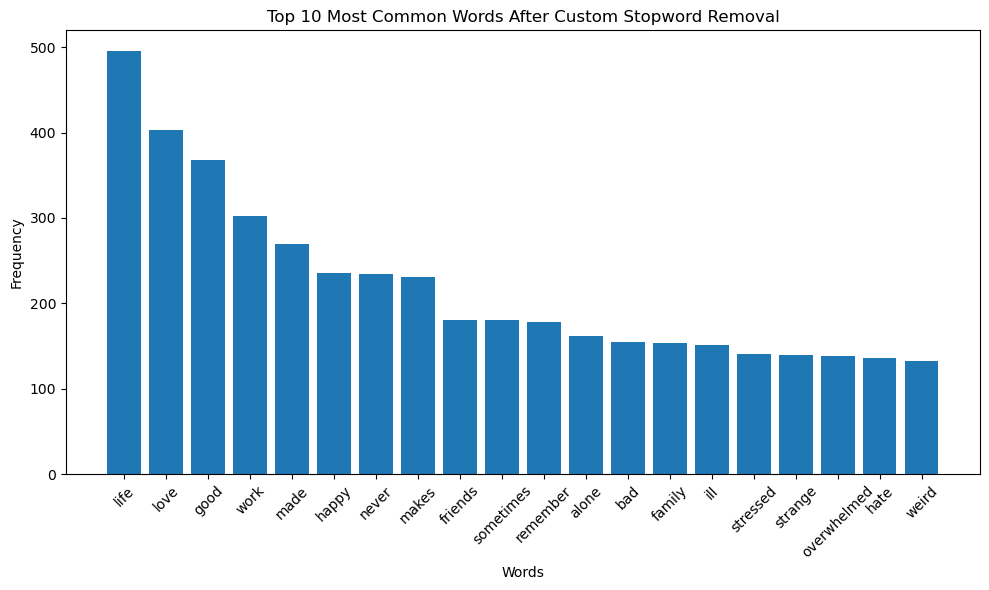

In [34]:
# Prepare data for visualization
words, counts = zip(*most_common_words)

# Plot the distribution of the most common words after removing custom stopwords
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words After Custom Stopword Removal')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
df.head()

text    label  word_count  \
0                              didnt feel humiliated  sadness           4   
1  go feeling hopeless damned hopeful around some...  sadness          21   
2          im grabbing minute post feel greedy wrong    anger          10   
4                                    feeling grouchy    anger           4   
5      ive feeling little burdened lately wasnt sure  sadness          12   

   text_length                               text_cleaned  
0           23                               [humiliated]  
1          108  [hopeless, damned, hopeful, cares, awake]  
2           48    [grabbing, minute, post, greedy, wrong]  
4           20                                  [grouchy]  
5           65                  [burdened, lately, wasnt]

### **Comprehensive Text Cleaning and Word Frequency Analysis**

To preprocess text data by removing URLs, special characters, extra spaces, and stopwords, converting text to lowercase, and tokenizing it. This ensures clean and consistent data for analysis, followed by identifying the top 10 most frequently occurring words to uncover key patterns and insights in the dataset.

In [37]:
# Process the text for cleaning
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string inputs (e.g., NaN or lists)
        text = str(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove all special characters, keeping only alphabetic characters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning process
df['text_cleaned'] = df['text_cleaned'].apply(clean_text)

# Remove stopwords
df['text_cleaned'] = df['text_cleaned'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Tokenize the cleaned content
df['text_tokenized'] = df['text_cleaned'].apply(lambda x: x.split())

# Flatten all tokenized words into a single list
flattened_words = [word for sublist in df['text_tokenized'] for word in sublist]

# Count word frequencies
wordfreqdist = Counter(flattened_words)

# Get the most common words
most_common_words = wordfreqdist.most_common(10)

# Display the results
print(most_common_words)


[('life', 495), ('love', 403), ('good', 368), ('work', 302), ('made', 270), ('happy', 235), ('never', 234), ('makes', 231), ('friends', 181), ('sometimes', 181)]


### **Visualization of Word Frequency After Preprocessing**

Graphically represent the frequency distribution of the most common words after thorough text preprocessing, providing clear insights into the dataset's prominent terms.

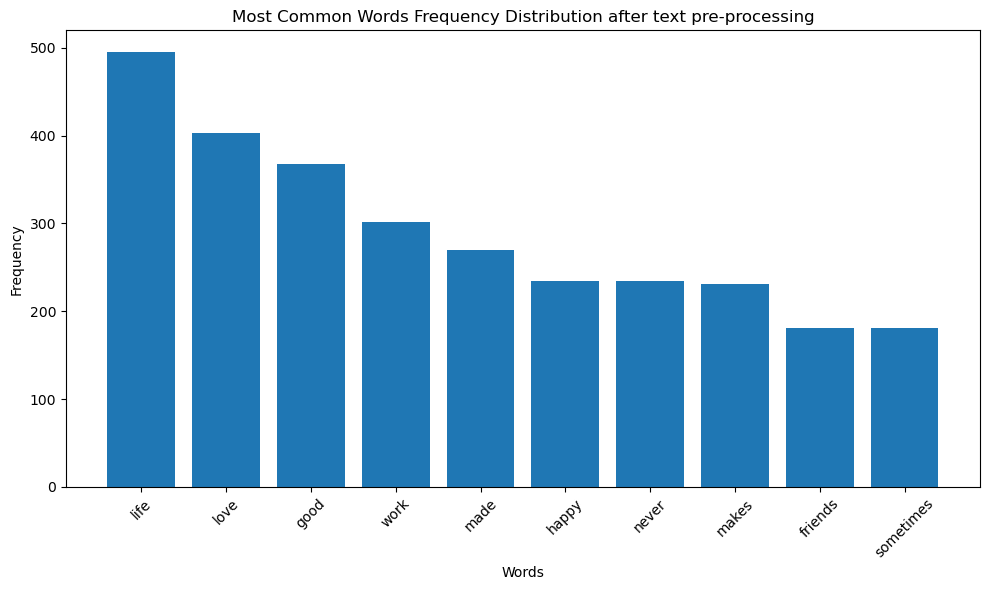

In [39]:
# Extract the most common words and their counts
words, counts = zip(*most_common_words)

# Create a bar chart of the most common words after text pre-processing
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Most Common Words Frequency Distribution after text pre-processing')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Handling Missing Values in Labels**
Identify and remove rows with missing values in the dataset, ensuring data completeness for accurate analysis and modeling.

In [41]:
# Count the rows where the 'label' column has empty values
nan_count = df['label'].isna().sum()
nan_count

572

In [42]:
# Remove rows with any empty values in the dataset
df = df.dropna()

In [43]:
# Check that the 'label' column has no empty values
nan_count = df['label'].isna().sum()
nan_count

0

In [44]:
df.sample(5)

text    label  word_count  \
15851  say feel like terrible person completely love ...  sadness          19   
2268                          must feeling little cranky    anger          10   
6258   feel completely emotionally exhausted pretty m...  sadness          24   
1449   could listen hours without feeling either thre...     fear          14   
7440   could try reach tongue lick vain close could f...      joy          28   

       text_length                                       text_cleaned  \
15851           93                      terrible completely love book   
2268            50                                        must cranky   
6258           121  completely emotionally exhausted point cut tie...   
1449            87   listen hours either threatened slightest shocked   
7440           124  reach tongue lick vain close divine warmth pus...   

                                          text_tokenized  
15851                 [terrible, completely, love, book]  
2268                                      [must, cranky]  
6258   [completely, emotionally, exhausted, point, cu...  
1449   [listen, hours, either, threatened, slightest,...  
7440   [reach, tongue, lick, vain, close, divine, war...

# **Average Word Count Analysis by Emotion**

Calculate and analyse the average word count for each emotion or label, providing insights into text length variations across different categories.

In [46]:
# Checking if the necessary columns ('text' and 'label') exist in the DataFrame
if 'text' in df.columns and 'label' in df.columns:

    # Calculate the word count for each entry in the 'text' column if not already calculated
    if 'word_count' not in df.columns:
        # Add a new column 'word_count' by splitting each text entry into words and counting them
        df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

    # Compute the average word count grouped by each unique label in the 'label' column
    avg_word_count = df.groupby('label')['word_count'].mean()

    # Print the average word count for each sentiment/emotion label
    print("Average Word Count by Emotion:\n", avg_word_count)
else:
    # Print an error message if either the 'text' or 'label' column is missing
    print("Error: Necessary columns ('text', 'label') not found in the DataFrame.")


Average Word Count by Emotion:
 label
anger      19.229736
fear       18.844605
joy        19.498135
sadness    18.361980
Name: word_count, dtype: float64


# **Average Character Count Analysis by Emotion**
Calculate and analyse the average character count for each emotion or label, providing distributions across different categories.

In [48]:
# Analyzing the character count in tweets
if 'text' in df.columns and 'label' in df.columns:

    # Calculate character count
    df['char_count'] = df['text'].apply(len)

    # Average character count by sentiment
    avg_char_count = df.groupby('label')['char_count'].mean()
    print("Average Character Count by Emotion:\n", avg_char_count)

else:
    print("Error: Necessary columns ('text', 'label') not found in the DataFrame.")

Average Character Count by Emotion:
 label
anger      61.370079
fear       61.555498
joy        62.635584
sadness    59.256322
Name: char_count, dtype: float64


# **Average Unique Word Count Analysis by Emotion**
Calculate and analyse the unique word count for each emotion or label, providing distributions across different emotions.

In [50]:
# Analyzing the unique words per tweet
if 'text' in df.columns and 'label' in df.columns:

    # Calculate unique word count
    df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

    # Average unique word count by sentiment
    avg_unique_word_count = df.groupby('label')['unique_word_count'].mean()
    print("Average Unique Word Count by Sentiment:\n", avg_unique_word_count)

else:
    print("Error: Necessary columns ('content', 'sentiment') not found in the DataFrame.")


Average Unique Word Count by Sentiment:
 label
anger      9.004169
fear       8.940114
joy        9.232376
sadness    8.722889
Name: unique_word_count, dtype: float64


# **Plot Unique Word Count Distribution Graph by Emotion**
Analysing the unique word count dsitribution for each emotion with a graph.

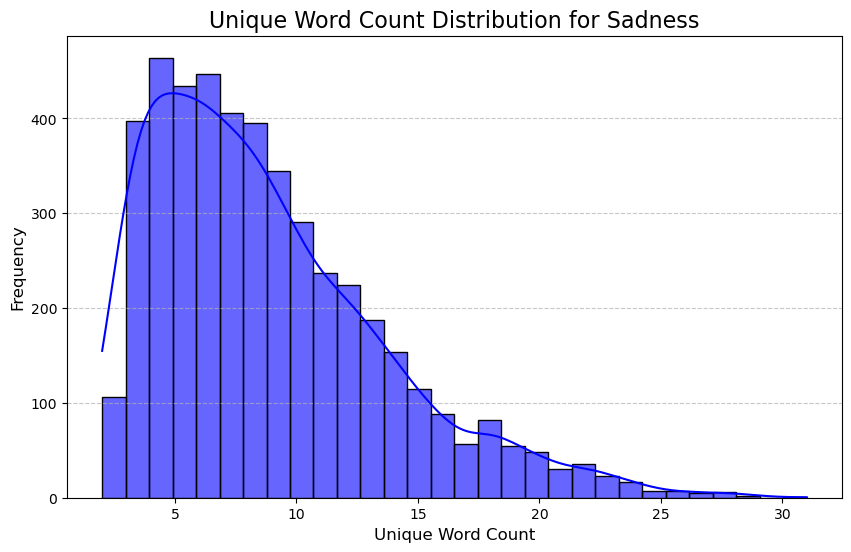

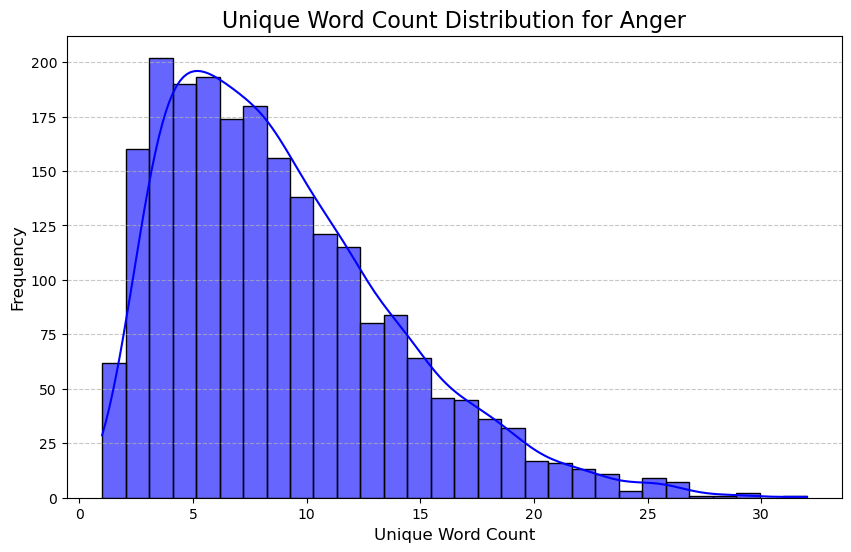

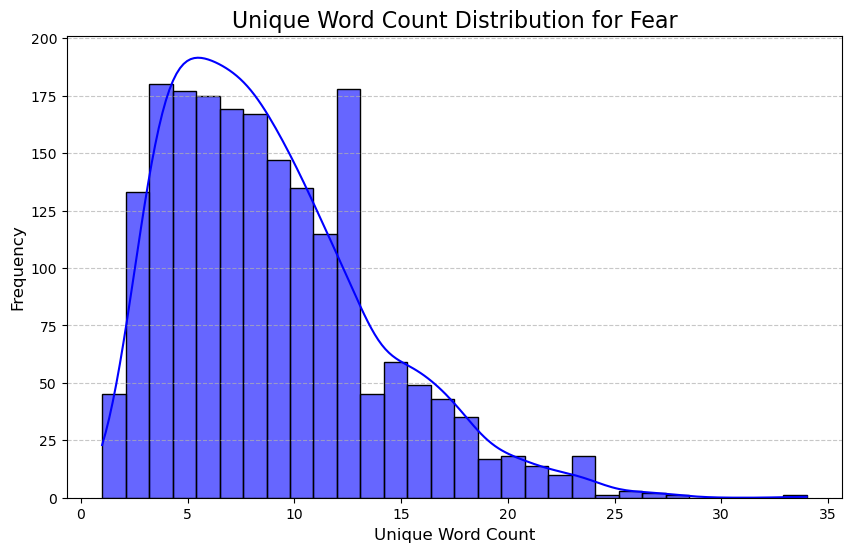

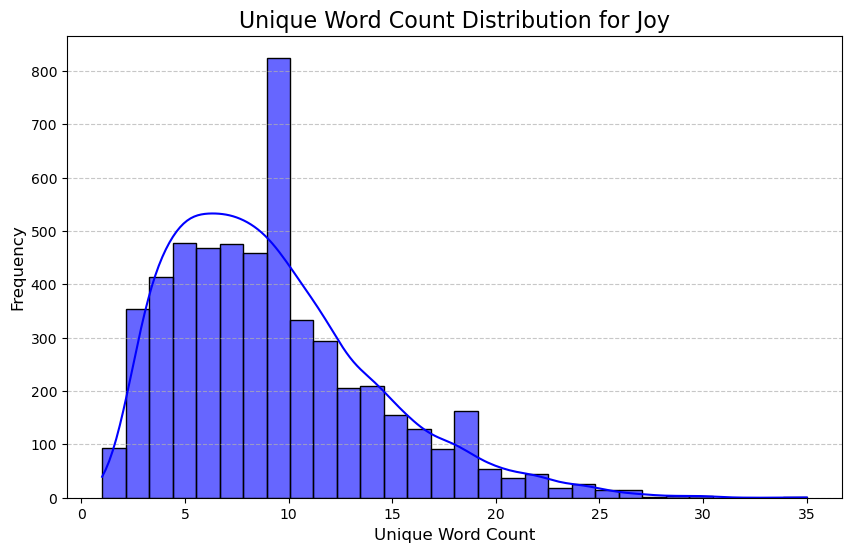

In [52]:
# Plotting the unique word count distribution for each sentiment label in the DataFrame
for emotion in df['label'].unique():  # Loop through each unique sentiment/emotion in the 'label' column
    # Create a new figure for each sentiment/emotion with specified dimensions
    plt.figure(figsize=(10, 6))

    # Plot a histogram for the 'unique_word_count' of tweets corresponding to the current emotion
    sns.histplot(
        data=df[df['label'] == emotion],  # Filter the DataFrame for rows matching the current emotion
        x='unique_word_count',  # Specify the column to plot
        bins=30,  # Number of bins in the histogram
        kde=True,  # Enable Kernel Density Estimation (KDE) for smoother curves
        color="blue",  # Set the color of the bars
        alpha=0.6  # Set the transparency level of the bars
    )

    # Set the title of the plot with the emotion name capitalized and a font size of 16
    plt.title(f'Unique Word Count Distribution for {emotion.capitalize()}', fontsize=16)

    # Label the x-axis as 'Unique Word Count' with a font size of 12
    plt.xlabel('Unique Word Count', fontsize=12)

    # Label the y-axis as 'Frequency' with a font size of 12
    plt.ylabel('Frequency', fontsize=12)

    # Add a grid to the y-axis for better visualization with dashed lines and partial transparency
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


# **Extracting Key Features Using TF-IDF**
To identify the top 50 important features (words) in the cleaned text data using TF-IDF vectorization, enabling the representation of text data as numerical values for further analysis.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for text feature extraction

# Combine the tokenized words into single strings for each row in the DataFrame
df['text_tokenized_joined'] = df['text_tokenized'].apply(lambda x: ' '.join(x))

# Proceed only if the 'text_tokenized_joined' column exists in the DataFrame
if 'text_tokenized_joined' in df.columns:
    # Initialize the TF-IDF vectorizer with a limit of 50 features and English stopwords removal
    vectorizer = TfidfVectorizer(max_features=50, stop_words='english')

    # Fit the vectorizer to the text data and transform it into a TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(df['text_tokenized_joined'])

    # Print the top 50 extracted TF-IDF features (words)
    print("\nTF-IDF Features (Top 50):")
    print(vectorizer.get_feature_names_out())  # Display the feature names
else:
    # Print an error message if the 'text_tokenized_joined' column is not found
    print("Error: 'text_tokenized_joined' column not found in the DataFrame.")



TF-IDF Features (Top 50):
['afraid' 'agitated' 'angry' 'bad' 'blog' 'cold' 'completely' 'excited'
 'family' 'free' 'friend' 'friends' 'god' 'good' 'guess' 'happy' 'hard'
 'hate' 'hated' 'heart' 'helpless' 'hope' 'hurt' 'id' 'ill' 'important'
 'life' 'looking' 'lost' 'love' 'makes' 'moment' 'morning' 'old' 'pain'
 'past' 'point' 'remember' 'sad' 'school' 'self' 'stop' 'stressed'
 'stupid' 'thinking' 'tired' 'wanted' 'went' 'work' 'writing']


# **Emotion-Specific Word Cloud Visualization**
To create word clouds for each emotion, highlighting the most frequent words associated with each label after text cleaning, for better understanding of text characteristics by emotion.

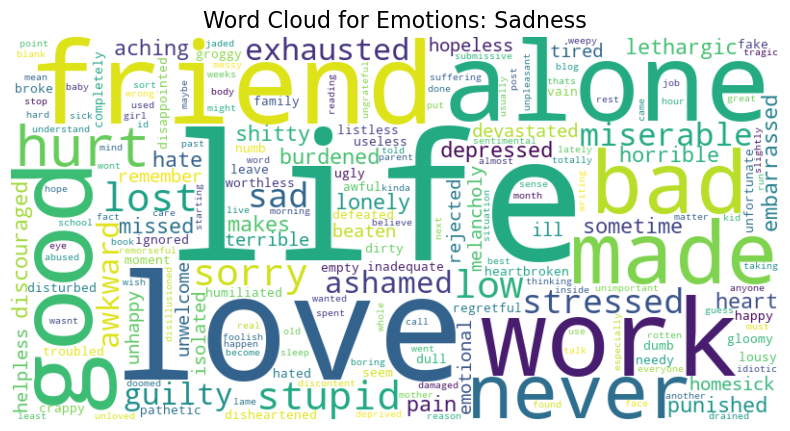

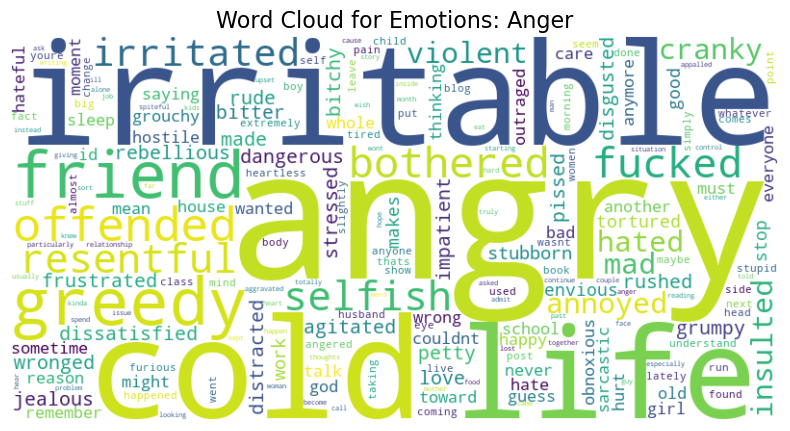

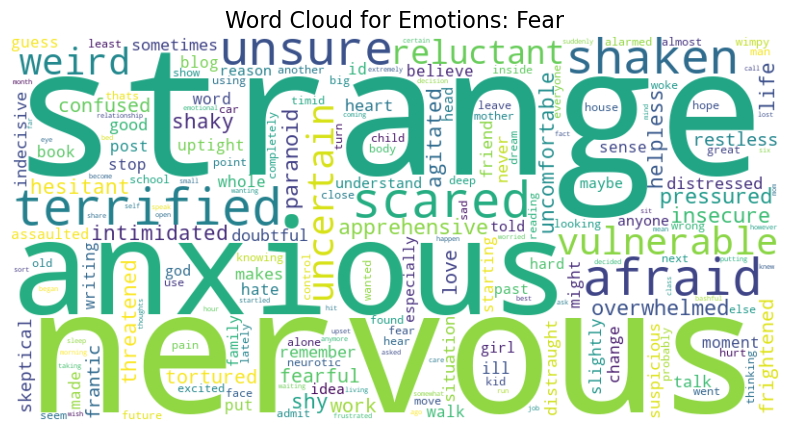

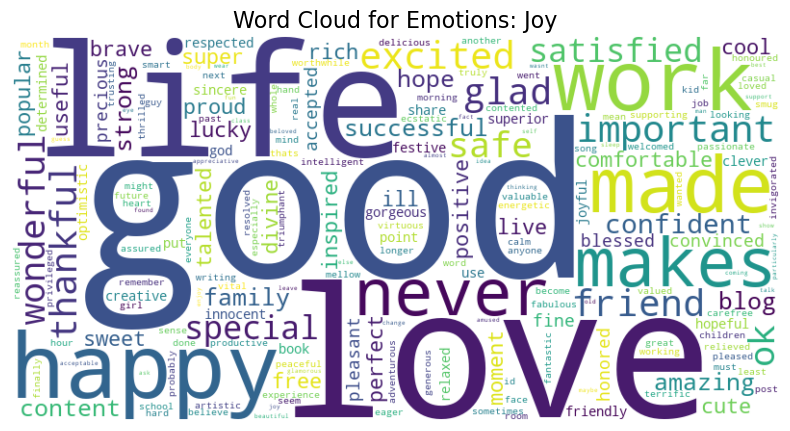

In [56]:
# Generate a word cloud for each emotion after text was cleaned
if 'text_cleaned' in df.columns and 'label' in df.columns:  # Check if the necessary columns ('text' and 'label') exist
    for emotion in df['label'].unique():  # Loop through each unique sentiment/emotion in the 'label' column

        # Combine all text entries for the current sentiment into a single string
        class_text = ' '.join(df[df['label'] == emotion]['text_cleaned'])

        # Generate a word cloud for the combined text
        wordcloud = WordCloud(
            width=800,  # Set the width of the word cloud image
            height=400,  # Set the height of the word cloud image
            background_color='white',  # Set the background color to white
            stopwords='english'  # Use built-in English stopwords to exclude common words
        ).generate(class_text)  # Generate the word cloud from the combined text

        # Plot the generated word cloud
        plt.figure(figsize=(10, 5))  # Set the figure size for the plot
        plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
        plt.axis('off')  # Remove the axes for better visualization
        plt.title(f"Word Cloud for Emotions: {emotion.capitalize()}", fontsize=16)  # Add a title with the sentiment name capitalized
        plt.show()  # Display the plot
else:
    # Print an error message if the necessary columns are not found
    print("Error: Necessary columns ('text_cleaned', 'label') not found in the DataFrame.")


# **First and Last Word Analysis**
Analysing the most common first and last words in the text data, providing insights into sentence structure and recurring themes in the dataset.

In [58]:
# First and last word analysis from the text
if 'text' in df.columns:  # Check if the 'text' column exists in the DataFrame

    # Extract the first word from the tokenized text, or assign an empty string if the text is empty
    df['first_word'] = df['text_tokenized'].apply(
        lambda x: str(x).split()[0] if len(str(x).split()) > 0 else ""
    )

    # Extract the last word from the tokenized text, or assign an empty string if the text is empty
    df['last_word'] = df['text_tokenized'].apply(
        lambda x: str(x).split()[-1] if len(str(x).split()) > 0 else ""
    )

    # Display the 10 most common first words in the 'first_word' column
    print("Most common first words:")
    print(df['first_word'].value_counts().head(10))

    # Display the 10 most common last words in the 'last_word' column
    print("\nMost common last words:")
    print(df['last_word'].value_counts().head(10))
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text' column not found in the DataFrame.")


Most common first words:
first_word
['love',        136
['remember',     97
['hate',         86
['never',        78
['guess',        71
['hope',         65
['woke',         53
['went',         52
['happy',        48
['id',           47
Name: count, dtype: int64

Most common last words:
last_word
'life']       123
'good']        60
'happy']       57
'work']        51
'love']        51
'alone']       47
'morning']     42
'anymore']     39
'sad']         36
'lately']      36
Name: count, dtype: int64


# **Bigram Collocation Analysis**
To identify and score the most significant word pairings (bigrams) in the cleaned text using likelihood ratio, uncovering meaningful and frequent word combinations in the dataset.

In [60]:
from nltk.collocations import BigramCollocationFinder  # Import BigramCollocationFinder for finding bigram collocations
from nltk.metrics import BigramAssocMeasures  # Import BigramAssocMeasures for scoring bigrams

# Ensure the 'text' column exists in the DataFrame
if 'text_cleaned' in df.columns:
    # Tokenize all text entries from the 'text' column and filter to include only alphanumeric words
    all_words = [
        word for text in df['text_cleaned']  # Iterate over each text in the 'text' column
        for word in word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        if word.isalnum()  # Include only alphanumeric words
    ]

    # Find bigram collocations using the tokenized words
    bigram_finder = BigramCollocationFinder.from_words(all_words)

    # Score the bigrams using the likelihood ratio association measure
    bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)

    # Display the top 10 bigram collocations along with their scores
    print("Top 10 Collocations:")
    for bigram, score in bigram_scores[:10]:  # Iterate through the top 10 bigrams
        print(f"{bigram}: {score}")  # Print each bigram and its likelihood ratio score
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text_cleaned' column not found in the DataFrame.")


Top 10 Collocations:
('target', 'blank'): 153.99551526026235
('looking', 'forward'): 150.5191845011943
('rel', 'bookmark'): 142.55000393522187
('rel', 'nofollow'): 138.0938257483849
('co', 'workers'): 130.9119527942145
('everyone', 'else'): 130.78635633024706
('anyone', 'else'): 129.31720397612432
('daily', 'basis'): 125.20366326895636
('high', 'school'): 115.46187830206452
('holy', 'spirit'): 104.89564632231509


# **Preprocess Text Data by Cleaning and Removing Noise**
This task involves cleaning the 'text_cleaned' column to ensure consistency and remove irrelevant words or noise. First, all values in the column are converted to valid strings, handling cases where entries might be tokenized lists or other non-string types. A custom set of stopwords, including HTML tags and generic terms, is then defined and used to filter out more unnecessary words from the text. Finally, the filtered words are reassembled into clean strings for further analysis.

In [62]:
# Ensure the 'text_cleaned' column contains strings
# If the value in 'text_cleaned' is a list (e.g., tokenized words), join the list into a single string.
# Otherwise, convert the value to a string (to handle cases like NaN or other non-string data types).
df['text_cleaned'] = df['text_cleaned'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x)
)

# Define custom stopwords
# This set contains words that are deemed irrelevant for analysis, such as HTML tags, generic words, or noise.
custom_stopwords = set([
    'target', 'blank', 'rel', 'bookmark', 'nofollow', 'img', 'src',  # Likely HTML or web scraping noise
    'everyone', 'else', 'anyone', 'daily', 'basis',  # Generic words lacking specific context
])

# Tokenize the cleaned text and remove custom stopwords
# For each entry in the 'text_cleaned' column:
# 1. Tokenize the text into individual words.
# 2. Remove any word that is in the custom stopwords set.
# 3. Join the filtered words back into a single string.
df['text_cleaned'] = df['text_cleaned'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in custom_stopwords])
)


# **Bigram Collocation Analysis - 2**
To identify and score the most significant word pairings (bigrams) in the cleaned text using likelihood ratio, uncovering the frequent word combinations in the dataset.

In [64]:
# Ensure the 'text' column exists in the DataFrame
if 'text_cleaned' in df.columns:
    # Tokenize all text entries from the 'text' column and filter to include only alphanumeric words
    all_words = [
        word for text in df['text_cleaned']  # Iterate over each text in the 'text' column
        for word in word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        if word.isalnum()  # Include only alphanumeric words
    ]

    # Find bigram collocations using the tokenized words
    bigram_finder = BigramCollocationFinder.from_words(all_words)

    # Score the bigrams using the likelihood ratio association measure
    bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)

    # Display the top 10 bigram collocations along with their scores after further data cleaning
    print("Top 10 Collocations:")
    for bigram, score in bigram_scores[:10]:  # Iterate through the top 10 bigrams
        print(f"{bigram}: {score}")  # Print each bigram and its likelihood ratio score
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text_cleaned' column not found in the DataFrame.")


Top 10 Collocations:
('looking', 'forward'): 150.3524118432776
('co', 'workers'): 130.83399349288896
('high', 'school'): 115.31759561934976
('holy', 'spirit'): 104.81769240394533
('fall', 'asleep'): 102.5801149107722
('damaged', 'goods'): 98.43255154482385
('please', 'free'): 97.61864810851282
('blah', 'blah'): 93.46295638020834
('ice', 'cream'): 92.70410615541459
('comfort', 'zone'): 91.19862289553681


# **N-gram Frequency Analysis and Visualization**
To extract and visualize the most frequent unigrams, bigrams, and trigrams in the text corpus, showing common patterns and phrases within the dataset.

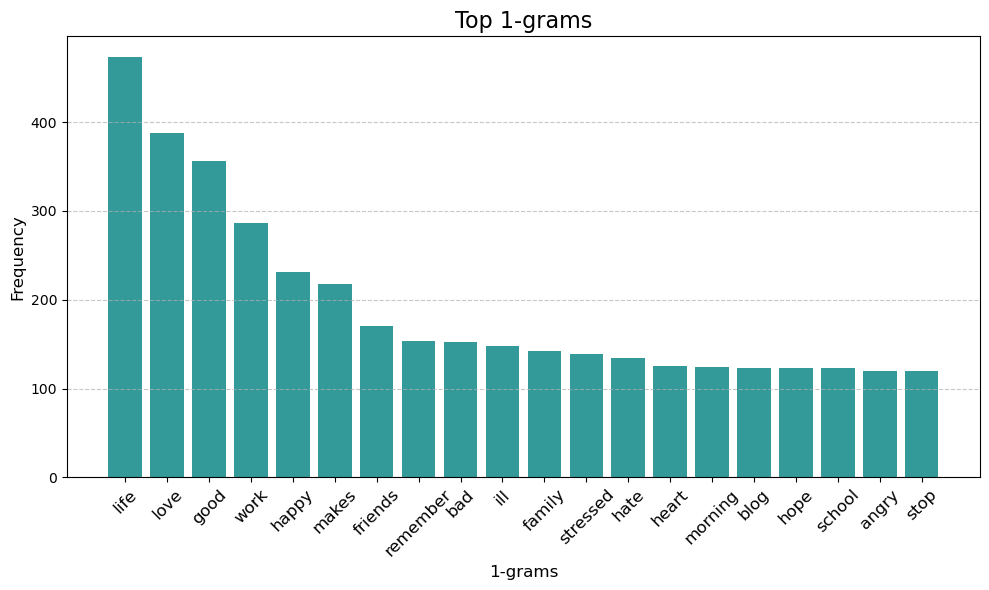

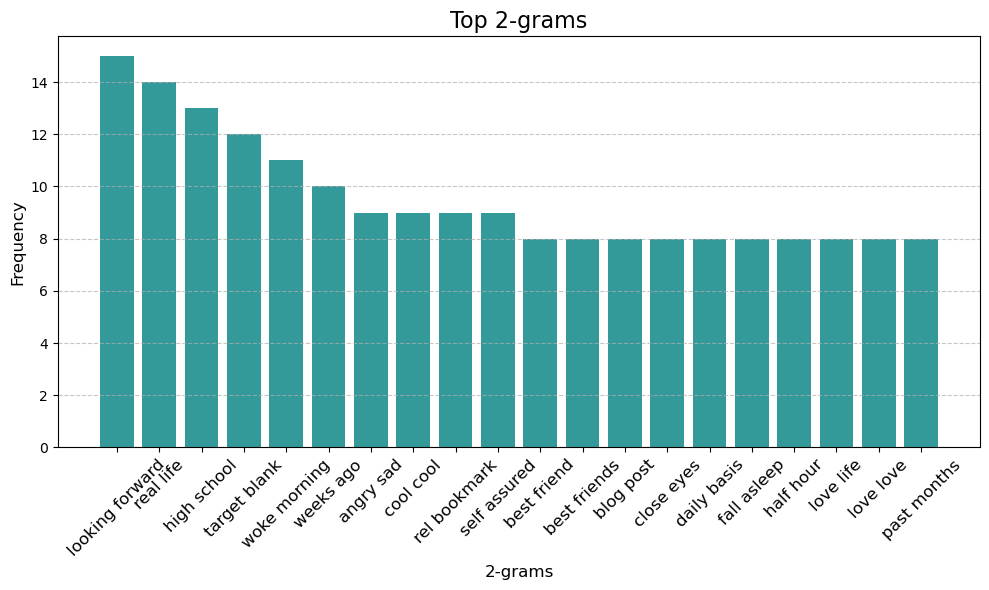

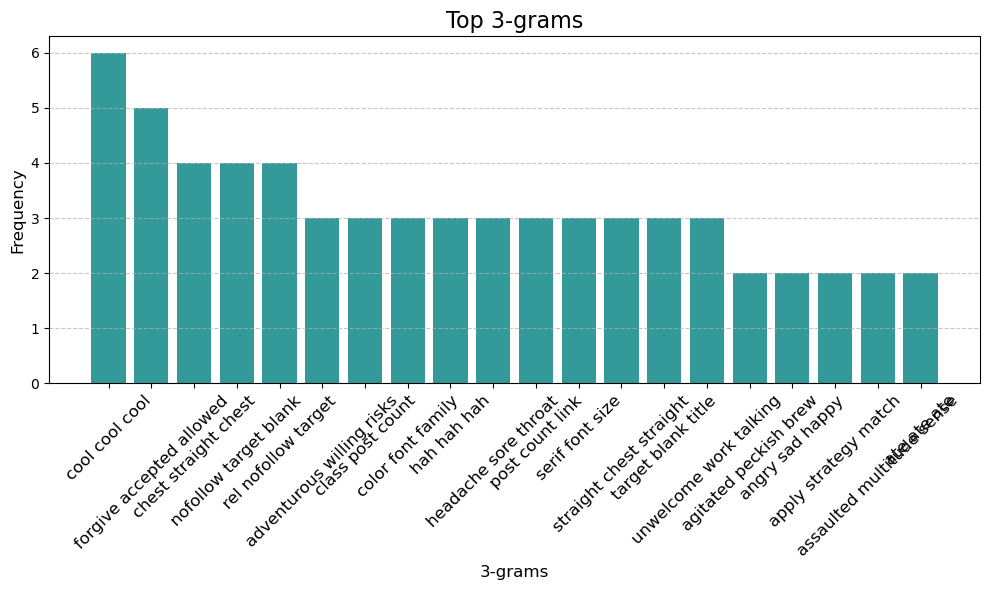

In [66]:
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for extracting n-grams
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Define a function to plot the top n-grams in the corpus
def plot_ngrams(corpus, n=1, top_k=20):
    # Vectorize the corpus to extract n-grams with specified n (unigrams, bigrams, trigrams, etc.)
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')  # Remove English stopwords
    ngram_counts = vectorizer.fit_transform(corpus)  # Generate the n-gram frequency matrix

    # Compute the frequency of each n-gram
    ngram_freq = ngram_counts.sum(axis=0).A1  # Sum occurrences across all documents and flatten the array
    ngram_freq = sorted(  # Sort n-grams by frequency in descending order
        list(zip(vectorizer.get_feature_names_out(), ngram_freq)),  # Pair n-grams with their frequencies
        key=lambda x: x[1],  # Sort by frequency
        reverse=True  # Highest frequency first
    )[:top_k]  # Keep only the top_k n-grams

    # Separate n-grams and their counts for plotting
    ngrams, counts = zip(*ngram_freq)

    # Plot the top n-grams
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(ngrams, counts, color='teal', alpha=0.8)  # Create a bar chart with specified color and transparency
    plt.title(f"Top {n}-grams", fontsize=16)  # Set the title of the plot
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.xlabel(f"{n}-grams", fontsize=12)  # Label the x-axis
    plt.ylabel("Frequency", fontsize=12)  # Label the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid to the y-axis for readability
    plt.tight_layout()  # Adjust layout to fit labels and prevent overlap
    plt.show()  # Display the plot

# Check if the 'text_tokenized' column exists in the DataFrame
if 'text_tokenized' in df.columns:
    # Combine tokenized words into strings for each document
    df['text_joined'] = df['text_tokenized'].apply(lambda x: ' '.join(x))

    # Generate and plot the top 20 unigrams
    plot_ngrams(df['text_joined'], n=1, top_k=20)

    # Generate and plot the top 20 bigrams
    plot_ngrams(df['text_joined'], n=2, top_k=20)

    # Generate and plot the top 20 trigrams
    plot_ngrams(df['text_joined'], n=3, top_k=20)
else:
    # Print an error message if the 'text_tokenized' column is not found
    print("Error: 'text_tokenized' column not found in the DataFrame.")


# **Perform K-Means Clustering on Text Data**
Convert the cleaned text into a TF-IDF matrix with 500 features, apply K-Means clustering to group the data into 5 clusters, and use PCA to reduce the matrix to 2 dimensions for visualizing the clusters.

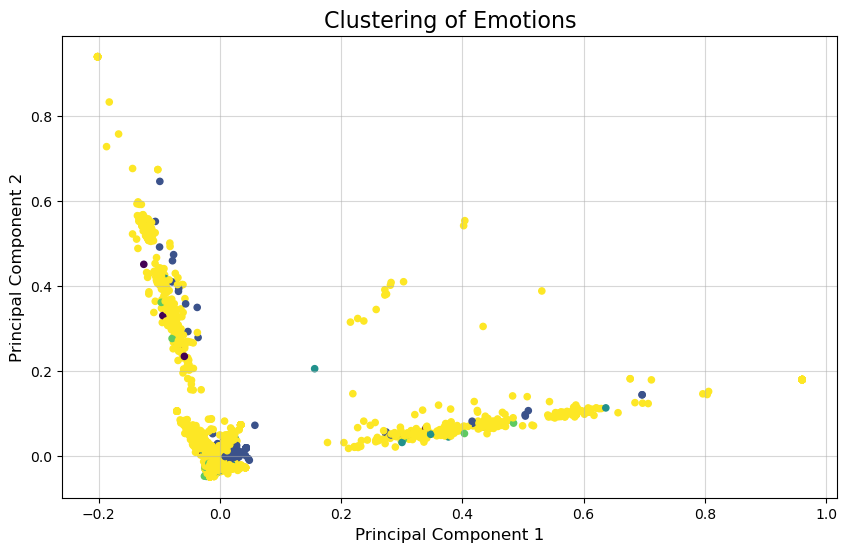

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for text feature extraction
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from sklearn.cluster import KMeans  # Import KMeans for clustering

# Ensure the 'text' column exists in the DataFrame
if 'text_cleaned' in df.columns:
    # Convert the text data to a TF-IDF matrix with a maximum of 150 features and English stopwords removal
    vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])  # Fit and transform the text data

    # Perform K-means clustering with 5 clusters
    kmeans = KMeans(n_clusters=5, random_state=0)  # Initialize K-means with 5 clusters
    labels = kmeans.fit_predict(tfidf_matrix)  # Predict cluster labels for each document

    # Use PCA to reduce the dimensionality of the TF-IDF matrix to 2 components for visualization
    pca = PCA(n_components=2)  # Initialize PCA with 2 components
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())  # Fit and transform the TF-IDF matrix

    # Plot the clusters in a 2D space
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    plt.scatter(
        reduced_data[:, 0],  # X-axis values (Principal Component 1)
        reduced_data[:, 1],  # Y-axis values (Principal Component 2)
        c=labels,  # Use cluster labels for coloring the points
        cmap='viridis',  # Set the color map for the clusters
        s=20  # Set the size of the points
    )
    plt.title("Clustering of Emotions", fontsize=16)  # Set the title of the plot
    plt.xlabel("Principal Component 1", fontsize=12)  # Label the x-axis
    plt.ylabel("Principal Component 2", fontsize=12)  # Label the y-axis
    plt.grid(alpha=0.5)  # Add a grid with partial transparency for better readability
    plt.show()  # Display the plot
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text' column not found in the DataFrame.")


# **Summary Statistics for Document Length**
Calculate and display the summary statistics for document length, measured in terms of both word count and character count, using the word_count and char_count columns. This includes metrics such as mean, standard deviation, minimum, maximum, and percentiles.

In [70]:
# Summary statistics for document length analysis
if 'word_count' in df.columns and 'char_count' in df.columns:  # Check if both 'word_count' and 'char_count' columns exist
    print("Summary Statistics for Document Length:\n")  # Print a header for the summary statistics

    # Display summary statistics for document length in terms of words
    print("Document Length (Words):")
    print(df['word_count'].describe())  # Use the describe() method to calculate and display statistics

    # Display summary statistics for document length in terms of characters
    print("\nDocument Length (Characters):")
    print(df['char_count'].describe())  # Use the describe() method to calculate and display statistics
else:
    # Print an error message if the required columns are not found in the DataFrame
    print("Error: Necessary columns ('word_count', 'char_count') not found in the DataFrame.")


Summary Statistics for Document Length:

Document Length (Words):
count    14124.000000
mean        18.992141
std         10.987966
min          2.000000
25%         10.750000
50%         17.000000
75%         25.000000
max         66.000000
Name: word_count, dtype: float64

Document Length (Characters):
count    14124.000000
mean        61.177641
std         35.209006
min          4.000000
25%         34.000000
50%         54.000000
75%         80.000000
max        232.000000
Name: char_count, dtype: float64


# **Extract and Analyze Top TF-IDF Features**
Transform the text data into a TF-IDF matrix with 300 features while removing English stopwords. Identify and display the top TF-IDF features along with their scores by summing their importance across all documents. Additionally, print the shape of the generated TF-IDF matrix.

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for text feature extraction

# Ensure the 'text' column exists in the DataFrame
if 'text' in df.columns:
    # Handle missing values in the 'text' column
    df['text'] = df['text'].fillna("")  # Replace NaN with an empty string

    # Initialize the TF-IDF vectorizer with a limit of 100 features and English stopwords removal
    tfidf_vectorizer = TfidfVectorizer(max_features=300, stop_words='english')

    # Fit the TF-IDF vectorizer to the text data and transform it into a TF-IDF matrix
    X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

    # Get the names of the top TF-IDF features (words)
    top_tfidf_features = tfidf_vectorizer.get_feature_names_out()

    # Calculate TF-IDF scores for all features
    tfidf_scores = X_tfidf.sum(axis=0).A1  # Sum TF-IDF scores across all documents
    feature_scores = list(zip(top_tfidf_features, tfidf_scores))
    sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

    # Display the top TF-IDF features with scores
    print("Top TF-IDF features with scores:")
    for feature, score in sorted_features:
        print(f"{feature}: {score:.2f}")

    # Display the size of the TF-IDF matrix
    print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
else:
    # Print an error message if the 'text' column is not found in the DataFrame
    print("Error: 'text' column not found in the DataFrame.")


Top TF-IDF features with scores:
feel: 2395.23
feeling: 1303.03
like: 832.27
im: 730.92
really: 325.59
know: 296.33
little: 278.11
time: 273.95
want: 234.64
people: 232.89
think: 226.27
ive: 217.17
bit: 216.74
life: 200.82
make: 199.35
going: 191.83
pretty: 185.97
dont: 181.68
way: 177.06
things: 173.13
love: 168.76
day: 168.60
right: 160.19
good: 159.65
today: 155.37
need: 149.91
say: 133.37
feelings: 132.86
work: 130.09
help: 122.32
feels: 121.69
didnt: 117.85
happy: 115.78
quite: 113.48
got: 110.62
felt: 107.71
look: 106.55
days: 105.29
sure: 103.45
makes: 102.45
left: 101.36
away: 101.11
kind: 97.59
person: 96.48
lot: 95.35
better: 94.10
home: 93.06
getting: 90.48
come: 89.47
world: 89.05
http: 88.44
actually: 86.79
thing: 84.79
new: 83.91
started: 83.57
friends: 82.96
remember: 82.62
bad: 81.75
stressed: 81.29
said: 80.88
times: 78.93
able: 78.18
trying: 77.08
year: 76.14
thought: 75.94
ill: 74.89
week: 74.44
family: 72.97
making: 72.93
hate: 72.73
try: 72.68
href: 71.20
long: 69.

In [73]:
df.sample(5)

text    label  word_count  \
8259                                    feel low already  sadness           5   
8957                           feel doubtful could wrong     fear          11   
11186                                   feel quite happy      joy           5   
11334    happy get back knew wouldnt feel crappy forever  sadness          16   
1799   ive heard stories julie baileys treatment firs...  sadness          46   

       text_length                                       text_cleaned  \
8259            23                                                low   
8957            50                                     doubtful wrong   
11186           21                                              happy   
11334           78                  happy knew wouldnt crappy forever   
1799           258  heard stories julie baileys treatment seen pri...   

                                          text_tokenized  char_count  \
8259                                               [low]          16   
8957                                   [doubtful, wrong]          25   
11186                                            [happy]          16   
11334            [happy, knew, wouldnt, crappy, forever]          47   
1799   [heard, stories, julie, baileys, treatment, se...         170   

       unique_word_count                              text_tokenized_joined  \
8259                   3                                                low   
8957                   4                                     doubtful wrong   
11186                  3                                              happy   
11334                  8                  happy knew wouldnt crappy forever   
1799                  24  heard stories julie baileys treatment seen pri...   

         first_word     last_word  \
8259        ['low']       ['low']   
8957   ['doubtful',      'wrong']   
11186     ['happy']     ['happy']   
11334     ['happy',    'forever']   
1799      ['heard',  'community']   

                                             text_joined  
8259                                                 low  
8957                                      doubtful wrong  
11186                                              happy  
11334                  happy knew wouldnt crappy forever  
1799   heard stories julie baileys treatment seen pri...

# **Perform Word Stemming and Analyze Word Frequencies**
Apply Porter Stemming to the tokenized content in the 'text_tokenized' column, reducing words to their root forms. Generate a frequency distribution of the top 20 most common stemmed words and visualize the results using a bar chart. This helps in identifying dominant word stems in the dataset after preprocessing.

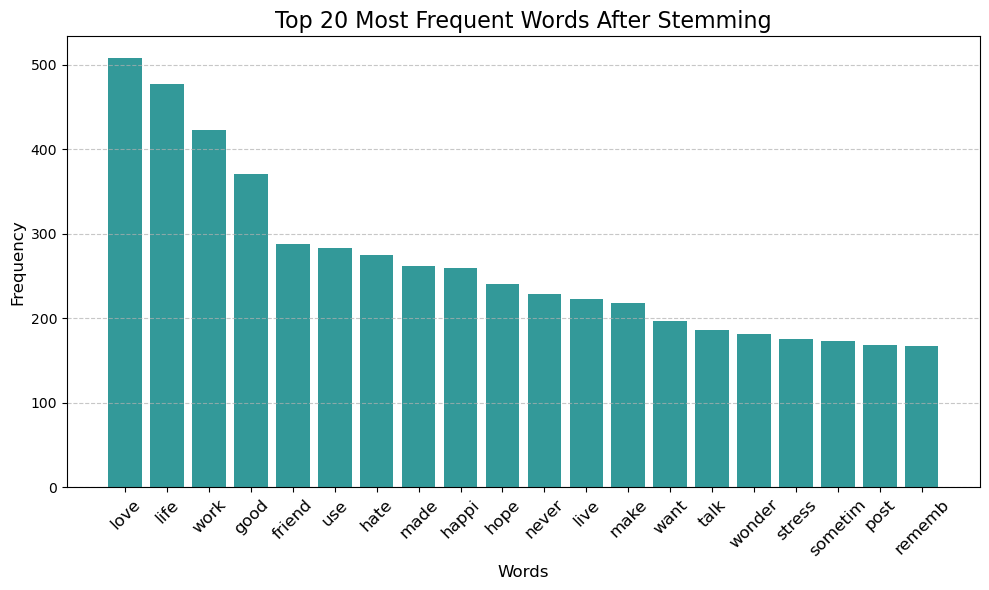

In [75]:
from nltk.stem import PorterStemmer  # Import PorterStemmer for word stemming

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokenized content
if 'text_tokenized' in df.columns:  # Check if the 'text_tokenized' column exists in the DataFrame
    # Apply the stemmer to each token in the tokenized content
    df['text_stemmed'] = df['text_tokenized'].apply(
        lambda tokens: [stemmer.stem(word) for word in tokens if len(word) > 1]  # Stem words longer than 1 character
    )

    # Flatten the stemmed content into a single list of words for frequency analysis
    flattened_words = [word for sublist in df['text_stemmed'] for word in sublist]

    # Count the most common words after stemming
    word_counts = Counter(flattened_words).most_common(20)

    # Extract the words and their respective counts for plotting
    words, counts = zip(*word_counts)

    # Plot the frequency distribution of the top 20 most common words
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    plt.bar(words, counts, color='teal', alpha=0.8)  # Create a bar plot with specified color and transparency
    plt.title("Top 20 Most Frequent Words After Stemming", fontsize=16)  # Set the title of the plot
    plt.xlabel("Words", fontsize=12)  # Label the x-axis as 'Words'
    plt.ylabel("Frequency", fontsize=12)  # Label the y-axis as 'Frequency'
    plt.xticks(rotation=45, fontsize=12)  # Rotate the x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid to the y-axis for clarity
    plt.tight_layout()  # Adjust layout to prevent overlap of labels and plot elements
    plt.show()  # Display the plot
else:
    # Print an error message if the 'text_tokenized' column is not found in the DataFrame
    print("Error: 'text_tokenized' column not found.")


# **Lemmatization of Stemmed Text**
Apply lemmatization using WordNet Lemmatizer to the stemmed tokens in the 'text_stemmed' column, converting words to their base forms. Filter out single-character words post-lemmatization to retain meaningful tokens. This process ensures that the text data is normalized and ready for further analysis.

In [77]:
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer for word lemmatization

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Check if the 'text_stemmed' column exists in the DataFrame
if 'text_stemmed' in df.columns:
    # Apply lemmatization to each token in the 'text_stemmed' column
    df['lemmatized_text'] = df['text_stemmed'].apply(
        lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]  # Perform lemmatization on each token
    )

    # Filter out single-character words post-lemmatization
    df['lemmatized_text'] = df['lemmatized_text'].apply(
        lambda tokens: [word for word in tokens if len(word) > 1]  # Exclude tokens with length <= 1
    )

    # Print a success message after applying lemmatization and filtering
    print("Lemmatization and filtering applied successfully.")
else:
    # Print an error message if the 'text_stemmed' column is not found in the DataFrame
    print("Error: 'text_stemmed' column not found.")


Lemmatization and filtering applied successfully.


# **Frequency Distribution of Words After Lemmatization**
Flatten the lemmatized tokens from all documents into a single list for frequency analysis. Identify the top 20 most frequent words using the `Counter` class and visualize their distribution with a bar chart. This process provides insights into the most commonly used words in the dataset after lemmatization.

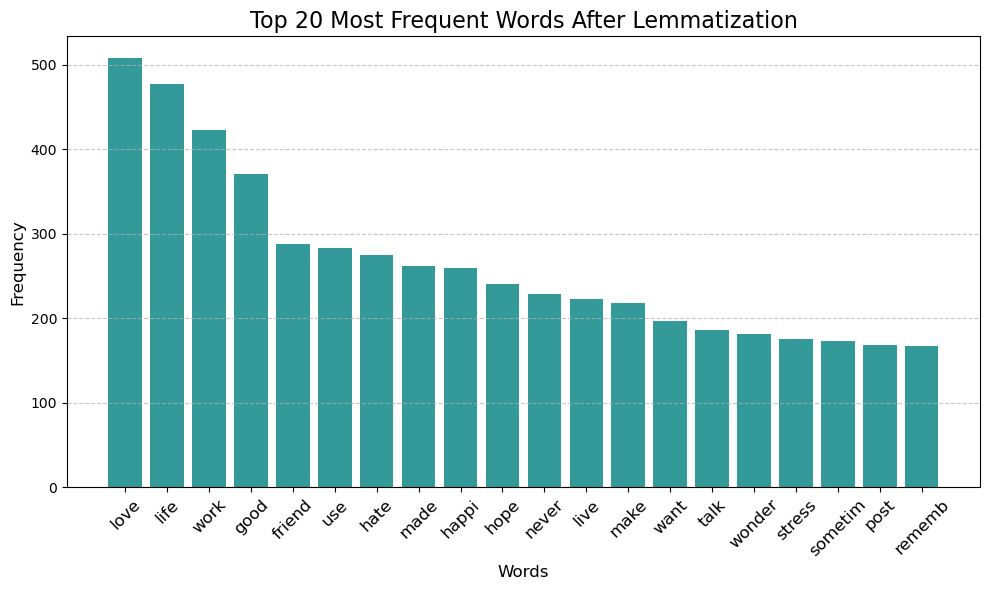

In [79]:
# Flatten the lemmatized content into a single list of words
flattened_words = [word for sublist in df['lemmatized_text'] for word in sublist]
# Combine all the lemmatized tokens from each document into a single list for frequency analysis

# Count the most common words from the flattened list
word_counts = Counter(flattened_words).most_common(20)
# Use the Counter class to calculate the frequency of each word and select the top 20 most common words

# Extract words and their counts from the word frequency list
words, counts = zip(*word_counts)
# Unpack the top 20 words and their corresponding counts into separate variables for plotting

# Plot the frequency distribution of the most common words
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(words, counts, color='teal', alpha=0.8)  # Create a bar plot with specified color and transparency
plt.title("Top 20 Most Frequent Words After Lemmatization", fontsize=16)  # Add a title to the plot
plt.xlabel("Words", fontsize=12)  # Label the x-axis as 'Words'
plt.ylabel("Frequency", fontsize=12)  # Label the y-axis as 'Frequency'
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a dashed grid to the y-axis for better visualization
plt.tight_layout()  # Adjust the layout to prevent overlap of plot elements
plt.show()  # Display the plot


# **Part-of-Speech (POS) Tagging for Tokenized Text**
Apply Part-of-Speech (POS) tagging to the tokenized content in the 'text_tokenized' column using NLTK's pos_tag. This assigns grammatical categories such as nouns, verbs and adjectives to each token, enabling deeper linguistic analysis of the text.

In [81]:
from nltk import pos_tag

# Ensure NLTK POS tagging resources are downloaded
nltk.download('averaged_perceptron_tagger')

# Generate POS tags for tokenized content
if 'text_tokenized' in df.columns:
    df['pos_tags'] = df['text_tokenized'].apply(pos_tag)
    print("POS tagging applied successfully.")
else:
    print("Error: 'text_tokenized' column not found.")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/moanish18/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


POS tagging applied successfully.


# **POS Tag Distribution Visualization**
Flatten the POS-tagged content from the `'pos_tags'` column, extract only the tags, and calculate their frequencies. Visualise the distribution of POS tags using a horizontal bar chart, highlighting the most common grammatical categories in the dataset.

/var/folders/1v/pl1p5c2x63nbm8rgmv8knxj00000gn/T/ipykernel_6093/1716979233.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tags), palette='magma')  # Create a horizontal bar plot with the 'magma' color palette


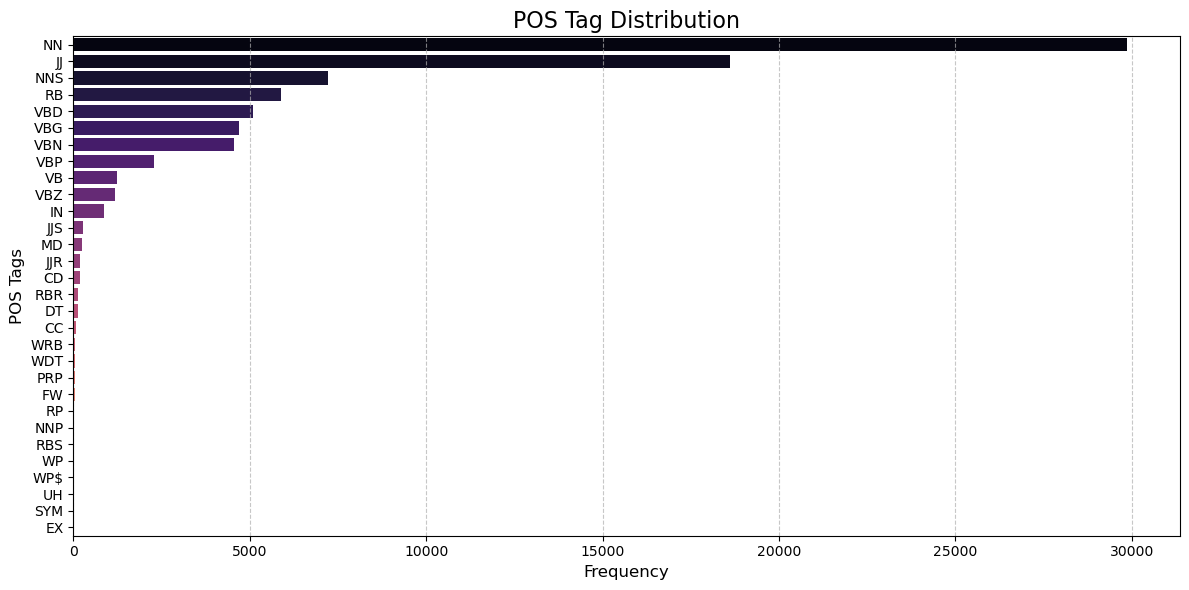

In [83]:
# Check if the 'pos_tags' column exists in the DataFrame
if 'pos_tags' in df.columns:
    # Ensure that the 'pos_tags' column contains tuples in the format [(word, tag), ...]

    # Flatten the list of POS tag tuples from all rows and extract only the tags
    all_tags = [tag for sublist in df['pos_tags'] for _, tag in sublist]

    # Count the frequency of each POS tag
    tag_freq = Counter(all_tags).most_common()

    # Extract the POS tags and their corresponding counts
    tags, counts = zip(*tag_freq)

    # Plot the distribution of POS tags
    plt.figure(figsize=(12, 6))  # Set the figure size for the plot
    sns.barplot(x=list(counts), y=list(tags), palette='magma')  # Create a horizontal bar plot with the 'magma' color palette
    plt.title("POS Tag Distribution", fontsize=16)  # Set the title of the plot
    plt.xlabel("Frequency", fontsize=12)  # Label the x-axis as 'Frequency'
    plt.ylabel("POS Tags", fontsize=12)  # Label the y-axis as 'POS Tags'
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a dashed grid to the x-axis for better visualization
    plt.tight_layout()  # Adjust the layout to prevent overlap of plot elements
    plt.show()  # Display the plot
else:
    # Print an error message if the 'pos_tags' column is not found in the DataFrame
    print("POS Tagging visualization failed: 'pos_tags' column not found.")


# **TF-IDF Feature Extraction and Train-Test Split**
Extract text features using TF-IDF (Term Frequency-Inverse Document Frequency) by first converting the cleaned text into a term-frequency matrix with `CountVectorizer` and then transforming it into a TF-IDF matrix using `TfidfTransformer`. Split the dataset into training and testing sets (80-20 ratio) for model evaluation. Display the feature vocabulary and the number of samples in each set.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer  # Import vectorizers and transformer for text feature extraction
from sklearn.model_selection import train_test_split  # Import train-test split utility

# Ensure that the necessary columns ('text' and 'label') exist in the DataFrame
if 'text_cleaned' in df.columns and 'label' in df.columns:
    # CountVectorizer: Convert text into feature vectors based on term frequency
    count_vectorizer = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vectorizer.fit_transform(df['text_cleaned'])  # Fit and transform the 'text' column into a term-frequency matrix

    # TfidfTransformer: Compute TF-IDF (Term Frequency-Inverse Document Frequency) weights
    tfidf_transformer = TfidfTransformer(use_idf=True)  # Initialize the transformer with IDF weighting enabled
    X_tfidf = tfidf_transformer.fit_transform(X_counts)  # Transform the term-frequency matrix to a TF-IDF matrix

    # TfidfVectorizer: Combine CountVectorizer and TfidfTransformer into a single step
    tfidf_vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer
    X_tfidf_vectorized = tfidf_vectorizer.fit_transform(df['text_cleaned'])  # Fit and transform the text directly to a TF-IDF matrix

    # Feature Names (Vocabulary): Display the terms/features extracted from the text
    print("Feature Names (Vocabulary):")
    print(tfidf_vectorizer.get_feature_names_out()[:10])  # Display the first 10 feature names for brevity

    # Extract the target variable (labels) from the 'label' column
    y = df['label']

    # Train-test Split: Split the dataset into training and testing sets for model evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf_vectorized,  # Feature matrix (TF-IDF vectorized)
        y,  # Target variable (labels)
        test_size=0.2,  # 20% of the data will be used as the test set
        random_state=42  # Set a random state for reproducibility
    )

    # Print the completion message and sizes of the training and testing sets
    print("\nFeature vector creation and train-test split completed.")
    print(f"Training set size: {X_train.shape[0]} samples")  # Number of samples in the training set
    print(f"Test set size: {X_test.shape[0]} samples")  # Number of samples in the test set
else:
    # Print an error message if the required columns are not found in the DataFrame
    print("Error: Necessary columns ('text', 'label') not found in the DataFrame.")


Feature Names (Vocabulary):
['aa' 'aaaaaaand' 'aaaaand' 'aaaand' 'aac' 'aaron' 'ab' 'abandon'
 'abandoned' 'abandoning']

Feature vector creation and train-test split completed.
Training set size: 11299 samples
Test set size: 2825 samples


# **Training and Evaluation of Multiple Models**
Train and evaluate various machine learning and neural network models to compare their performance on a multi-class classification problem.


Models Trained:
1. Logistic Regression

2. Naive Bayes (Multinomial)

3. Naive Bayes (Gaussian)

4. Naive Bayes (Bernoulli)

5. XGBoost

6. CatBoost

7. LightGBM

8. Extra Trees Classifier

9. Random Forest

10. AdaBoost

11. Bagging Classifier

12. Gradient Boosting

13. Decision Tree

14. SVM (RBF Kernel)

15. Linear SVM

16. K-Nearest Neighbors (KNN)

17. Perceptron

18. Passive Aggressive Classifier

19. SGD Classifier

20. Ridge Classifier

20. Neural Network

Evaluation Metrics:

**Accuracy**: Percentage of correctly classified instances.

**Training Time**: Time taken for model training.

**Classification Report**: Includes precision, recall, and F1-score for each class.


`Neural Network Configuration`:
Input Layer: 128 neurons with ReLU activation.
Hidden Layer: 64 neurons with ReLU activation.
Dropout Layers: Dropout rate of 0.3 after each layer to prevent overfitting.
Output Layer: Uses softmax activation for multi-class classification.
Optimizer: Adam optimizer.
Loss Function: Categorical cross-entropy.
Epochs: 25 with a batch size of 32.

Summary:
Performance metrics for all models are displayed, highlighting accuracy and training times.

In [87]:
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import (
    ExtraTreesClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np

# Step 1: Label Encoding for Target Labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display label mappings
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Convert labels to one-hot encoding for the neural network
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Step 2: Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Linear SVM": LinearSVC(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Perceptron": Perceptron(max_iter=1000, random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
}

# Step 3: Train and Evaluate Models
model_performance = {}
classification_reports = {}
training_times = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Measure training time
    start_time = time.time()
    if model_name in ["Naive Bayes (Gaussian)", "Naive Bayes (Bernoulli)"]:
        model.fit(X_train.toarray(), y_train_encoded)
    else:
        model.fit(X_train, y_train_encoded)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[model_name] = training_time

    # Predict and evaluate
    y_pred = model.predict(X_test.toarray() if model_name in ["Naive Bayes (Gaussian)", "Naive Bayes (Bernoulli)"] else X_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    accuracy = accuracy_score(y_test, y_pred_decoded)
    model_performance[model_name] = accuracy
    classification_reports[model_name] = classification_report(y_test, y_pred_decoded, zero_division=0)

    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Training Time: {training_time:.2f} seconds\n")
    print(f"Classification Report for {model_name}:\n{classification_reports[model_name]}\n")

# Step 4: Add Neural Network Training and Evaluation
print("Training Neural Network...")
nn_start_time = time.time()

# Define the neural network
model_nn = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train.toarray(), y_train_one_hot, epochs=25, batch_size=32, validation_split=0.2, verbose=0)
nn_end_time = time.time()

# Evaluate the model
nn_accuracy = model_nn.evaluate(X_test.toarray(), y_test_one_hot, verbose=0)[1]
nn_training_time = nn_end_time - nn_start_time

# Store Neural Network results
model_performance["Neural Network"] = nn_accuracy
training_times["Neural Network"] = nn_training_time

print(f"Neural Network Accuracy: {nn_accuracy:.2f}")
print(f"Training Time: {nn_training_time:.2f} seconds\n")

# Step 5: Display Model Performance Summary
print("\nModel Performance Summary:")
for model_name, accuracy in model_performance.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}, Training Time = {training_times[model_name]:.2f} seconds")


Label Mapping: {'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3}
Training Logistic Regression...
Logistic Regression Accuracy: 0.91
Training Time: 0.34 seconds

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       anger       0.92      0.80      0.86       425
        fear       0.94      0.78      0.85       384
         joy       0.89      0.97      0.93      1095
     sadness       0.90      0.93      0.91       921

    accuracy                           0.91      2825
   macro avg       0.91      0.87      0.89      2825
weighted avg       0.91      0.91      0.90      2825


Training Naive Bayes (Multinomial)...
Naive Bayes (Multinomial) Accuracy: 0.79
Training Time: 0.00 seconds

Classification Report for Naive Bayes (Multinomial):
              precision    recall  f1-score   support

       anger       0.95      0.46      0.62       425
        fear       0.98      0.33      0.49       384
         joy       0.78      0.96 

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:42:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.92
Training Time: 2.13 seconds

Classification Report for XGBoost:
              precision    recall  f1-score   support

       anger       0.90      0.88      0.89       425
        fear       0.89      0.90      0.90       384
         joy       0.92      0.97      0.94      1095
     sadness       0.95      0.89      0.92       921

    accuracy                           0.92      2825
   macro avg       0.91      0.91      0.91      2825
weighted avg       0.92      0.92      0.92      2825


Training CatBoost...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CatBoost Accuracy: 0.92
Training Time: 22.55 seconds

Classification Report for CatBoost:
              precision    recall  f1-score   support

       anger       0.89      0.90      0.89       425
        fear       0.92      0.88      0.90       384
         joy       0.94      0.96      0.95      1095
     sadness       0.93      0.92      0.93       921

    accuracy                           0.92      2825
   macro avg       0.92      0.91      0.92      2825
weighted avg       0.92      0.92      0.92      2825


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12350
[LightGBM] [Info] Number of data points in the train set: 11299, number of used features: 771
[LightGBM] [Info] Start training from score -1.874283
[LightGBM] [Info] Start training from score -1.984526
[LightGBM] [Info] Start training from score -0.973803


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.45
Training Time: 8.19 seconds

Classification Report for AdaBoost:
              precision    recall  f1-score   support

       anger       0.35      0.03      0.06       425
        fear       0.87      0.35      0.50       384
         joy       0.44      0.99      0.61      1095
     sadness       0.18      0.04      0.06       921

    accuracy                           0.45      2825
   macro avg       0.46      0.35      0.31      2825
weighted avg       0.40      0.45      0.33      2825


Training SGD Classifier...
SGD Classifier Accuracy: 0.92
Training Time: 0.02 seconds

Classification Report for SGD Classifier:
              precision    recall  f1-score   support

       anger       0.90      0.88      0.89       425
        fear       0.91      0.86      0.89       384
         joy       0.93      0.96      0.95      1095
     sadness       0.92      0.92      0.92       921

    accuracy                           0.92      2825
   macro avg       0.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


K-Nearest Neighbors Accuracy: 0.55
Training Time: 0.00 seconds

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

       anger       0.95      0.25      0.40       425
        fear       0.90      0.23      0.37       384
         joy       0.47      0.99      0.63      1095
     sadness       0.93      0.29      0.44       921

    accuracy                           0.55      2825
   macro avg       0.81      0.44      0.46      2825
weighted avg       0.75      0.55      0.50      2825


Training Perceptron...
Perceptron Accuracy: 0.90
Training Time: 0.01 seconds

Classification Report for Perceptron:
              precision    recall  f1-score   support

       anger       0.87      0.84      0.85       425
        fear       0.87      0.82      0.85       384
         joy       0.93      0.94      0.94      1095
     sadness       0.89      0.91      0.90       921

    accuracy                           0.90      2825
   macro av

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.88
Training Time: 23.79 seconds


Model Performance Summary:
Logistic Regression: Accuracy = 0.91, Training Time = 0.34 seconds
Naive Bayes (Multinomial): Accuracy = 0.79, Training Time = 0.00 seconds
Naive Bayes (Gaussian): Accuracy = 0.42, Training Time = 0.89 seconds
Naive Bayes (Bernoulli): Accuracy = 0.74, Training Time = 0.52 seconds
XGBoost: Accuracy = 0.92, Training Time = 2.13 seconds
CatBoost: Accuracy = 0.92, Training Time = 22.55 seconds
LightGBM: Accuracy = 0.91, Training Time = 0.66 seconds
Extra Trees: Accuracy = 0.93, Training Time = 27.43 seconds
Random Forest: Accuracy = 0.92, Training Time = 12.95 seconds
AdaBoost: Accuracy = 0.45, Training Time = 8.19 seconds
SGD Classifier: Accuracy = 0.92, Training Time = 0.02 seconds
Ridge Classifier: Accuracy = 0.91, Training Time = 0.02 seconds
Bagging Classifier: Accuracy = 0.92, Training Time = 5.34 seconds
Gradient Boosting: Accuracy = 0.87, Training Time = 33.84 seconds
Decision Tree: Accuracy = 0

# **Training and Evaluating High-Performing Models**
Encode target labels and train selected machine learning models with a performance threshold above 91%. Evaluate their accuracy and training time for multi-class classification tasks.

Models Trained:
1. XGBoost: Gradient Boosted Trees with log-loss evaluation.
2. CatBoost: Efficient gradient boosting for categorical data.
3. Extra Trees: Ensemble method using randomized decision trees.
4. SGD Classifier: Stochastic Gradient Descent optimization.
5. Ridge Classifier: Linear classifier with L2 regularization.
6. Logistic Regression: Linear classifier for probabilistic prediction.

Evaluation Metrics:

Accuracy: Proportion of correctly classified samples.

Training Time: Duration taken to train each model.

Classification Report: Precision, recall, and F1-score breakdown for each class.


Summary:
Performance metrics for each model, including accuracy and training time, are summarized to identify the best-performing model.

In [89]:
# Step 1: Label Encoding for Target Labels
label_encoder = LabelEncoder()  # Initialize LabelEncoder
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels into integers
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels into integers

# Display the mapping of original labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Models with performance above 91% were selected
models = {  # Define a dictionary of models with their configurations
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Step 3: Train and Evaluate Models
# Initialize dictionaries to store model performance metrics
model_performance = {}  # Dictionary to store accuracy for each model
classification_reports = {}  # Dictionary to store classification reports for each model
training_times = {}  # Dictionary to store training times for each model

# Loop through each model
for model_name, model in models.items():
    print(f"Training {model_name}...")  # Print the model being trained

    # Measure the training time
    start_time = time.time()  # Record the start time
    model.fit(X_train, y_train_encoded)  # Train the model on the encoded training data
    end_time = time.time()  # Record the end time
    training_time = end_time - start_time  # Calculate the total training time
    training_times[model_name] = training_time  # Store the training time

    # Make predictions on the test set
    y_pred = model.predict(X_test)  # Predict encoded labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)  # Decode predictions back to original labels

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_decoded)  # Calculate accuracy
    model_performance[model_name] = accuracy  # Store the accuracy
    classification_reports[model_name] = classification_report(  # Store the classification report
        y_test, y_pred_decoded, zero_division=0
    )

    # Print model performance metrics
    print(f"{model_name} Accuracy: {accuracy:.2f}")  # Print the accuracy
    print(f"Training Time: {training_time:.2f} seconds\n")  # Print the training time
    print(f"Classification Report for {model_name}:\n{classification_reports[model_name]}\n")  # Print the classification report

# Step 4: Display Model Performance Summary
print("\nModel Performance Summary:")
for model_name, accuracy in model_performance.items():  # Iterate through model performance dictionary
    print(f"{model_name}: Accuracy = {accuracy:.2f}, Training Time = {training_times[model_name]:.2f} seconds")  # Print summary


Label Mapping: {'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3}
Training XGBoost...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:44:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.92
Training Time: 1.85 seconds

Classification Report for XGBoost:
              precision    recall  f1-score   support

       anger       0.90      0.88      0.89       425
        fear       0.89      0.90      0.90       384
         joy       0.92      0.97      0.94      1095
     sadness       0.95      0.89      0.92       921

    accuracy                           0.92      2825
   macro avg       0.91      0.91      0.91      2825
weighted avg       0.92      0.92      0.92      2825


Training CatBoost...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CatBoost Accuracy: 0.92
Training Time: 21.54 seconds

Classification Report for CatBoost:
              precision    recall  f1-score   support

       anger       0.89      0.90      0.89       425
        fear       0.92      0.88      0.90       384
         joy       0.94      0.96      0.95      1095
     sadness       0.93      0.92      0.93       921

    accuracy                           0.92      2825
   macro avg       0.92      0.91      0.92      2825
weighted avg       0.92      0.92      0.92      2825


Training Extra Trees...
Extra Trees Accuracy: 0.93
Training Time: 26.99 seconds

Classification Report for Extra Trees:
              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       425
        fear       0.89      0.89      0.89       384
         joy       0.95      0.96      0.96      1095
     sadness       0.93      0.93      0.93       921

    accuracy                           0.93      2825
   macro avg       0.92     

# **Visualizing Learning Curves for Selected Models**
Evaluate the performance of selected models by plotting their learning curves. The process involves:

1. Feature Extraction: Convert text data into numerical features using TF-IDF vectorization with 1000 features, removing stopwords.

2. Label Encoding: Encode target labels into numeric format.

3. Dataset Splitting: Divide the dataset into training (80%) and testing (20%) subsets.

Models Evaluated:

1. XGBoost: Gradient Boosted Trees
2. SGD Classifier: Stochastic Gradient Descent optimization
3. Ridge Classifier: Linear classifier with L2 regularization
4. Logistic Regression: Probabilistic linear classifier

Learning Curve Metrics:

Training Accuracy: Model accuracy on progressively larger subsets of training data.
Validation Accuracy: Model accuracy on cross-validated data.

Each model's learning curve includes:

Accuracy trends across different training set sizes.
Training time and final model accuracy displayed below the plot.
This visualization highlights model performance and helps diagnose issues such as underfitting or overfitting.

Generating learning curve for XGBoost...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:45:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:45:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:45:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning

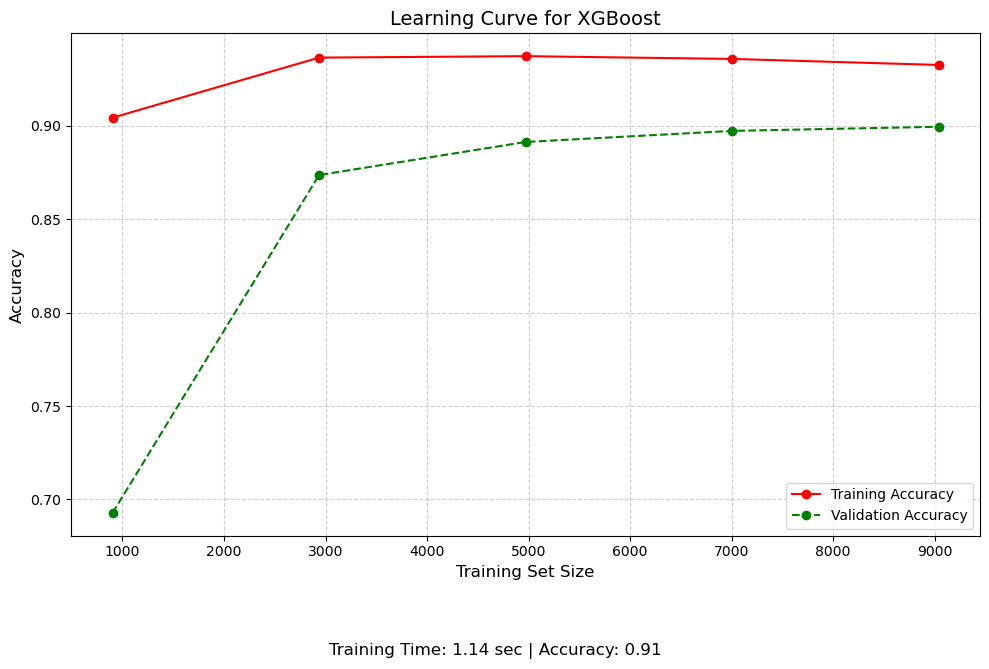

Generating learning curve for SGD Classifier...


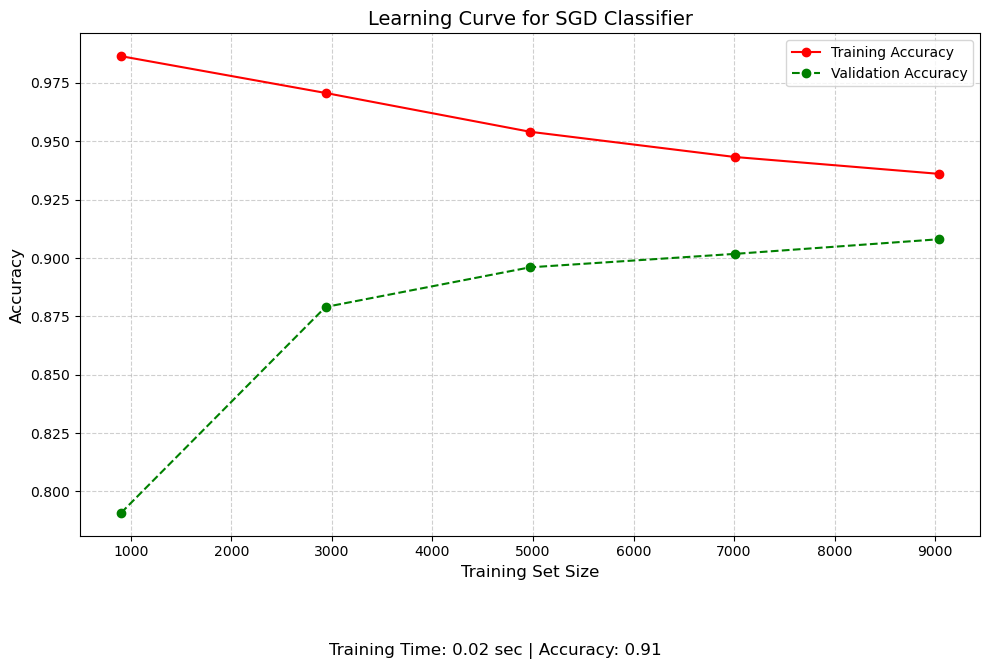

Generating learning curve for Extra Trees...


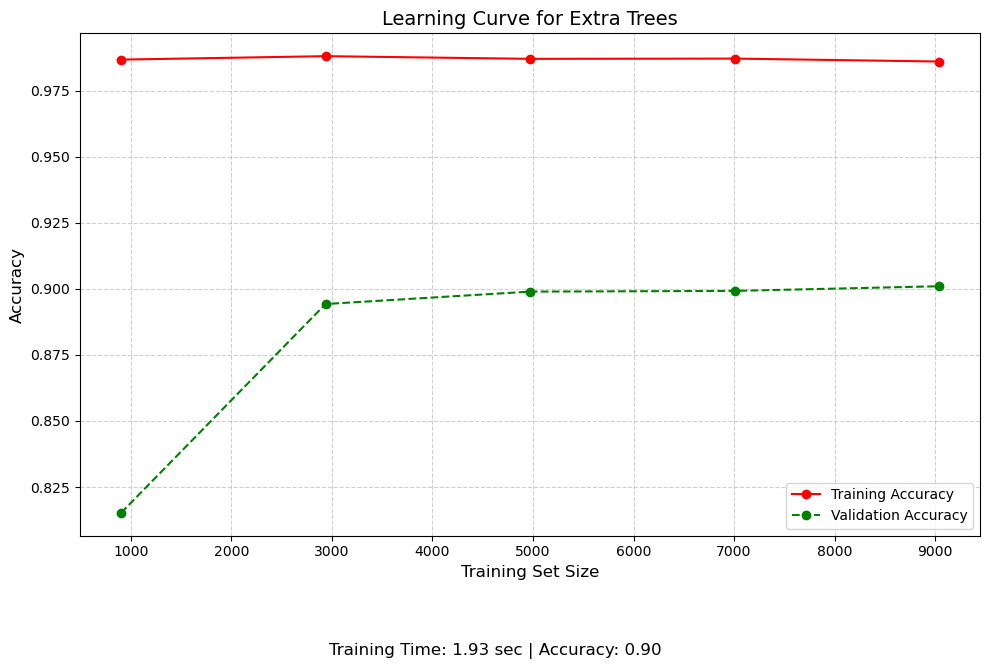

Generating learning curve for Ridge Classifier...


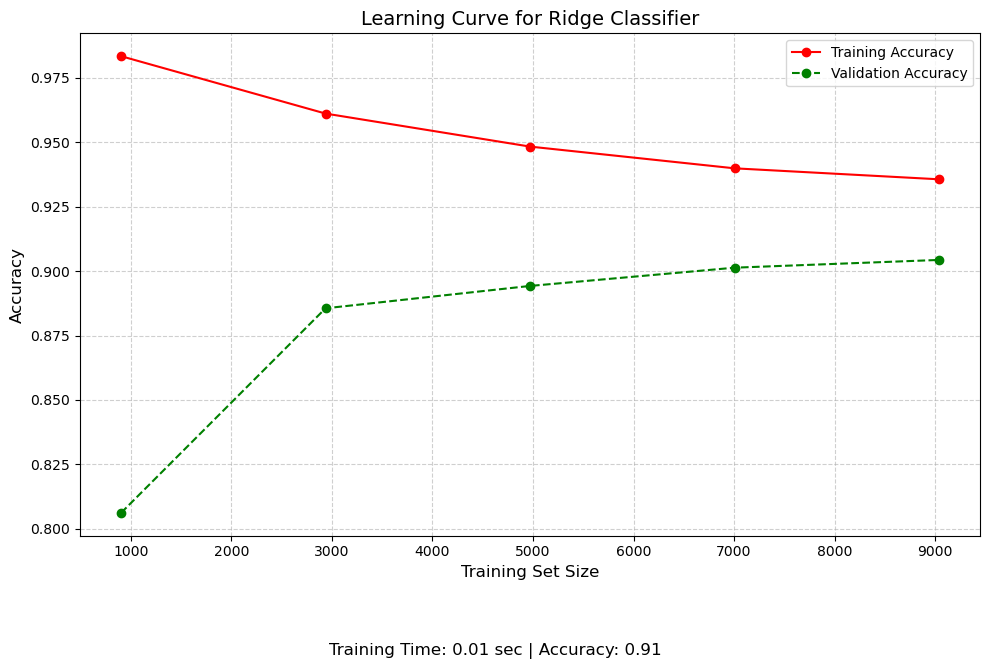

Generating learning curve for Logistic Regression...


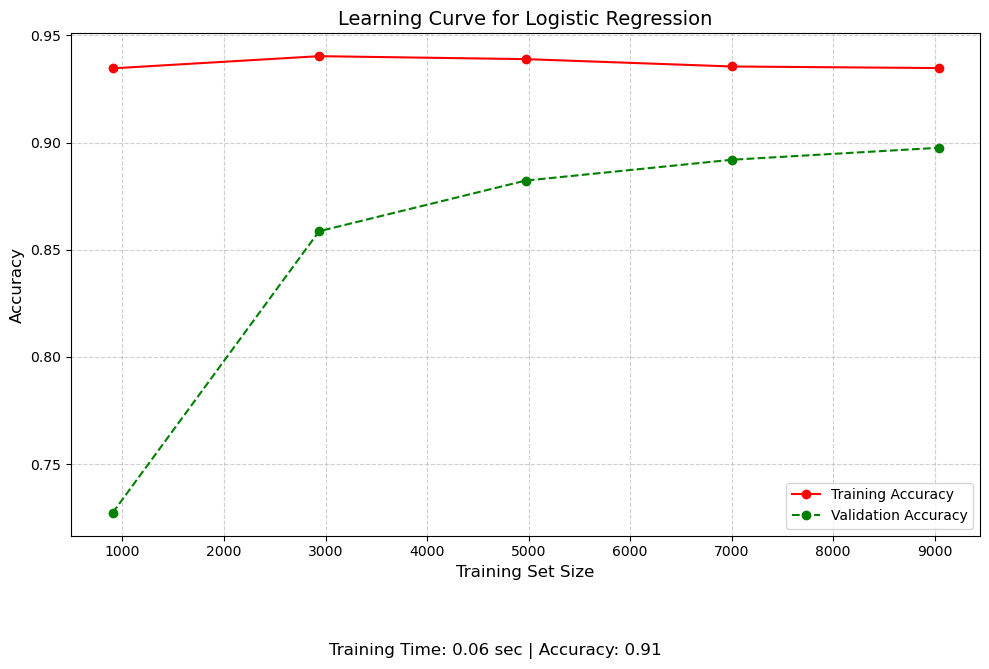

In [91]:
from sklearn.model_selection import learning_curve, train_test_split
import warnings
import xgboost as xgb

# Suppress warnings
warnings.filterwarnings("ignore")
xgb.set_config(verbosity=0)

# Step 1: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text_cleaned'])

# Step 2: Encode labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Step 3: Split dataset into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Define models to evaluate
selected_models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=10000, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Function to plot learning curves
def plot_learning_curve_with_metrics(model, X, y, title):
    start_time = time.time()
    model.fit(X, y)
    train_time = time.time() - start_time
    accuracy = model.score(X_test, y_test_encoded)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="red", marker="o")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", color="green", linestyle="--", marker="o")
    plt.title(title, fontsize=14)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.figtext(0.5, -0.1, f"Training Time: {train_time:.2f} sec | Accuracy: {accuracy:.2f}",
                wrap=True, horizontalalignment='center', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot learning curves for each model
for model_name, model in selected_models.items():
    print(f"Generating learning curve for {model_name}...")
    plot_learning_curve_with_metrics(model, X_train, y_train_encoded, f"Learning Curve for {model_name}")


# **Model Evaluation and Performance Metrics**
Evaluate selected models using key performance metrics and visualizations to assess their performance on a classification task.

Metrics Evaluated:

Accuracy: Overall proportion of correctly classified samples.
Precision: Proportion of true positives among predicted positives (weighted average).
Recall: Proportion of true positives among actual positives (weighted average).
F1-Score: Harmonic mean of precision and recall (weighted average).

Visualizations:

Confusion Matrix: Provides a detailed breakdown of predictions versus actual labels.

Implementation Details:

The evaluation process iterates over selected models, training them on the training set and evaluating them on the test set.
The confusion matrix is plotted for all models.
A summary table of evaluation metrics is created for easy comparison.

Output:

Detailed metrics for each model in tabular format.
Visualizations for confusion matrices.

Evaluating metrics for XGBoost...


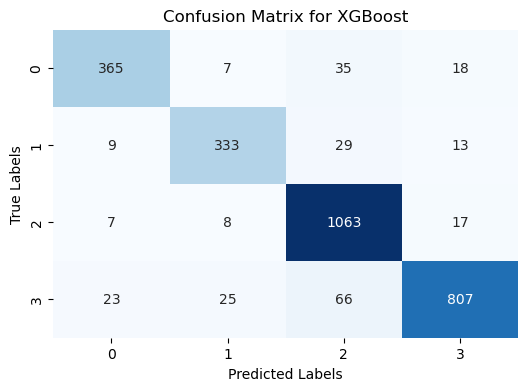

Evaluating metrics for SGD Classifier...


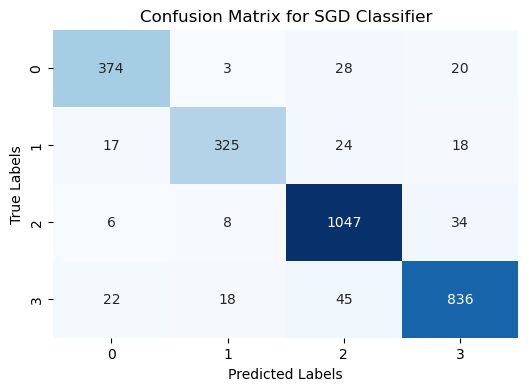

Evaluating metrics for Extra Trees...


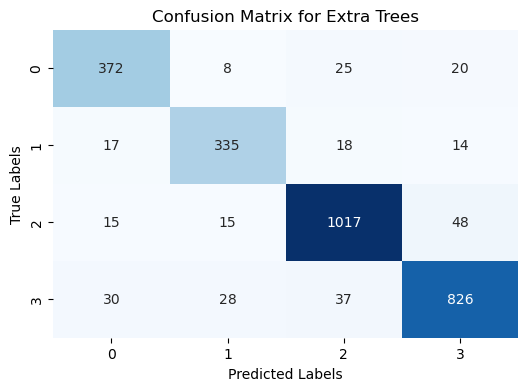

Evaluating metrics for Ridge Classifier...


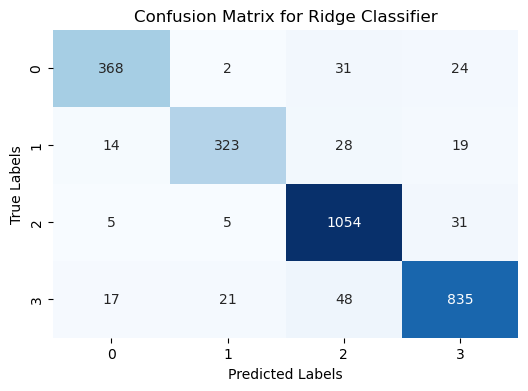

Evaluating metrics for Logistic Regression...


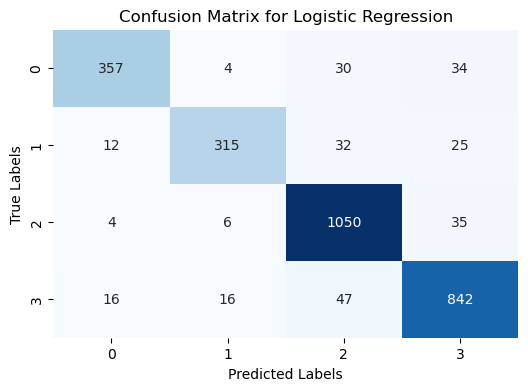


Evaluation Metrics:
                     Accuracy  Precision    Recall  F1 Score
XGBoost              0.909027   0.910360  0.909027  0.908511
SGD Classifier       0.913982   0.913990  0.913982  0.913593
Extra Trees          0.902655   0.902840  0.902655  0.902717
Ridge Classifier     0.913274   0.913487  0.913274  0.912731
Logistic Regression  0.907611   0.908066  0.907611  0.906852


In [93]:
from sklearn.metrics import (  # Import metrics for model evaluation
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Prepare a dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Function to calculate and store evaluation metrics
def evaluate_model(model, model_name, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy metric
    precision = precision_score(y_test, y_pred, average="weighted")  # Weighted precision
    recall = recall_score(y_test, y_pred, average="weighted")  # Weighted recall
    f1 = f1_score(y_test, y_pred, average="weighted")  # Weighted F1-score

    # Store the metrics in the evaluation_metrics dictionary
    evaluation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Generate and plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Plot the confusion matrix
    plt.title(f"Confusion Matrix for {model_name}")  # Add a title
    plt.xlabel("Predicted Labels")  # Label the x-axis
    plt.ylabel("True Labels")  # Label the y-axis
    plt.show()  # Display the plot

    # Generate and plot the ROC curve (only for binary classification)
    if len(set(y_test)) == 2:  # Check if the problem is binary classification
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Compute the ROC curve
        roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC)
        plt.figure(figsize=(6, 4))  # Set the figure size
        plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")  # Plot the ROC curve
        plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Plot the diagonal line (random classifier)
        plt.title(f"ROC Curve for {model_name}")  # Add a title
        plt.xlabel("False Positive Rate")  # Label the x-axis
        plt.ylabel("True Positive Rate")  # Label the y-axis
        plt.legend(loc="best")  # Add a legend
        plt.grid(True, linestyle="--", alpha=0.6)  # Add a grid for clarity
        plt.show()  # Display the plot

# Evaluate and visualize metrics for each selected model
for model_name, model in selected_models.items():  # Loop through each selected model
    print(f"Evaluating metrics for {model_name}...")  # Print progress
    model.fit(X_train, y_train_encoded)  # Train the model on the training data
    evaluate_model(model, model_name, X_test, y_test_encoded)  # Evaluate the model

# Display evaluation metrics in tabular format
metrics_df = pd.DataFrame(evaluation_metrics).T  # Convert the dictionary to a DataFrame and transpose it
print("\nEvaluation Metrics:")  # Print a header
print(metrics_df)  # Display the evaluation metrics


# **Hyperparameter Tuning and Performance Evaluation**
This script performs **TF-IDF vectorization** on cleaned text, encodes target labels, and splits the data into training and testing sets. It fine-tunes four models (**SGD Classifier, Logistic Regression, Ridge Classifier, XGBoost**) using **GridSearchCV** to find the best hyperparameters. The script evaluates each model's performance (accuracy, training time) and summarizes results in a tabular format.

In [95]:
import warnings
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

# Check if the DataFrame contains the required columns 'text' and 'label'
if 'text_cleaned' in df.columns and 'label' in df.columns:
    # Step 1: Feature Extraction with TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit features to 1000
    X_tfidf_vectorized = tfidf_vectorizer.fit_transform(df['text_cleaned'])  # Transform 'text' column
    y = df['label']  # Target variable

    # Step 2: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf_vectorized, y, test_size=0.2, random_state=42
    )

    # Step 3: Label Encoding for Target Labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Display label mappings
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Label Mapping:", label_mapping)

    # Step 4: Define Models and Hyperparameter Grids
    models_with_params = {
        "SGD Classifier": (SGDClassifier(random_state=42), {
            'max_iter': [1000, 2000],  # Maximum number of iterations
            'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
            'loss': ['hinge', 'log_loss'],  # Loss functions
        }),
        "Logistic Regression": (LogisticRegression(random_state=42), {
            'C': [0.1, 1.0, 10],  # Inverse of regularization strength
            'solver': ['lbfgs', 'liblinear'],  # Optimization solvers
            'max_iter': [100, 200],  # Maximum number of iterations
        }),
        "Ridge Classifier": (RidgeClassifier(random_state=42), {
            'alpha': [0.1, 1.0, 10.0],  # Regularization strength
        }),
        "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
            'n_estimators': [50, 100],  # Number of trees
            'learning_rate': [0.1, 0.2],  # Learning rate
            'max_depth': [3, 5],  # Maximum tree depth
        }),
    }

    # Dictionaries to store performance and best parameters
    model_performance = {}
    best_params = {}

    # Step 5: Train and Tune Each Model
    for model_name, (model, param_grid) in models_with_params.items():
        print(f"Tuning hyperparameters for {model_name}...")

        # Grid Search for Hyperparameter Tuning
        grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
        start_time = time.time()  # Start timer
        grid_search.fit(X_train, y_train_encoded)  # Fit the model
        training_time = time.time() - start_time  # Calculate training time

        # Best model and parameters
        best_model = grid_search.best_estimator_
        best_params[model_name] = grid_search.best_params_

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        model_performance[model_name] = {
            "Accuracy": accuracy,
            "Training Time (s)": training_time
        }

        # Print results for the current model
        print(f"{model_name} Best Parameters: {grid_search.best_params_}")
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(f"{model_name} Training Time: {training_time:.2f} seconds\n")

    # Step 6: Display Model Performance Summary
    print("\nModel Performance Summary:")
    performance_df = pd.DataFrame(model_performance).T  # Convert to DataFrame for readability
    print(performance_df)

    # Step 7: Display Best Hyperparameters
    print("\nBest Hyperparameters for Each Model:")
    for model_name, params in best_params.items():
        print(f"{model_name}: {params}")

else:
    print("Error: Necessary columns ('text', 'label') not found in the DataFrame.")


Label Mapping: {'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3}
Tuning hyperparameters for SGD Classifier...
SGD Classifier Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000}
SGD Classifier Accuracy: 0.91
SGD Classifier Training Time: 0.14 seconds

Tuning hyperparameters for Logistic Regression...
Logistic Regression Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.91
Logistic Regression Training Time: 0.24 seconds

Tuning hyperparameters for Ridge Classifier...
Ridge Classifier Best Parameters: {'alpha': 0.1}
Ridge Classifier Accuracy: 0.91
Ridge Classifier Training Time: 0.05 seconds

Tuning hyperparameters for XGBoost...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:46:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:46:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:46:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning

XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
XGBoost Accuracy: 0.90
XGBoost Training Time: 3.84 seconds


Model Performance Summary:
                     Accuracy  Training Time (s)
SGD Classifier       0.913982           0.140916
Logistic Regression  0.908319           0.242777
Ridge Classifier     0.910796           0.049487
XGBoost              0.904779           3.838004

Best Hyperparameters for Each Model:
SGD Classifier: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000}
Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Ridge Classifier: {'alpha': 0.1}
XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


# **Refined Hyperparameter Tuning for SGD and Ridge Classifiers**
This code fine-tunes SGD Classifier and Ridge Classifier using GridSearchCV for hyperparameter optimization. The models are evaluated on accuracy, training time, and their classification reports. Results include the best hyperparameters and model performance metrics, summarized in table format.

In [97]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier, RidgeClassifier

# Define hyperparameter grids for refined models which have less training time and accuracy above 91%
refined_models_with_params = {
    # SGD Classifier
    "SGD Classifier": (SGDClassifier(random_state=42), {
        'max_iter': [1000, 2000, 5000],  # Maximum number of iterations
        'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
        'loss': ['hinge', 'log_loss', 'modified_huber'],  # Loss functions
        'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization penalties
    }),
    # Ridge Classifier
    "Ridge Classifier": (RidgeClassifier(random_state=42), {
        'alpha': [0.5, 1.0, 2.0, 5.0],  # Regularization strength
        'solver': ['auto', 'lsqr', 'sag'],  # Solvers for optimization
    }),
}

# Dictionaries to store performance results
refined_model_performance = {}
refined_classification_reports = {}
refined_training_times = {}

# Fine-tune and evaluate each model
if 'X_train' in globals() and 'y_train_encoded' in globals():
    for model_name, (model, param_grid) in refined_models_with_params.items():
        print(f"Tuning hyperparameters for {model_name}...")

        # Initialize GridSearchCV
        grid_search = GridSearchCV(
            model, param_grid, scoring='accuracy', cv=3, n_jobs=-1
        )

        # Measure training time
        start_time = time.time()
        grid_search.fit(X_train, y_train_encoded)
        training_time = time.time() - start_time

        # Retrieve the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Make predictions and evaluate performance
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        classification_report_str = classification_report(
            y_test_encoded, y_pred, zero_division=0
        )

        # Store results
        refined_model_performance[model_name] = {
            "Accuracy": accuracy,
            "Training Time (s)": training_time,
            "Best Params": best_params,
        }
        refined_training_times[model_name] = training_time
        refined_classification_reports[model_name] = classification_report_str

        # Display results for current model
        print(f"\n{model_name} Best Parameters: {best_params}")
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(f"{model_name} Training Time: {training_time:.2f} seconds")
        print(f"Classification Report:\n{classification_report_str}")

    # Summarize all models' performance
    print("\nRefined Model Performance Summary:")
    summary_df = pd.DataFrame(refined_model_performance).T
    print(summary_df)

else:
    print("Error: Ensure 'X_train' and 'y_train_encoded' are defined before running this code.")


Tuning hyperparameters for SGD Classifier...

SGD Classifier Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
SGD Classifier Accuracy: 0.92
SGD Classifier Training Time: 0.61 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       425
           1       0.93      0.84      0.89       384
           2       0.91      0.96      0.94      1095
           3       0.93      0.91      0.92       921

    accuracy                           0.92      2825
   macro avg       0.91      0.90      0.91      2825
weighted avg       0.92      0.92      0.92      2825

Tuning hyperparameters for Ridge Classifier...

Ridge Classifier Best Parameters: {'alpha': 1.0, 'solver': 'lsqr'}
Ridge Classifier Accuracy: 0.91
Ridge Classifier Training Time: 0.08 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       4

# **Learning Curve Analysis for Ridge and SGD Classifiers**
This code shows the performance of SGD Classifier and Ridge Classifier by using learning curves. It begins by transforming text data into numerical features through TF-IDF vectorization, followed by label encoding and splitting the dataset into training and testing sets. The learning curves visualize training and validation accuracy across varying training set sizes, highlighting the models' learning dynamics. Additionally, the training time and overall accuracy for each model are displayed to assess their efficiency and effectiveness.

Generating learning curve for SGD Classifier...


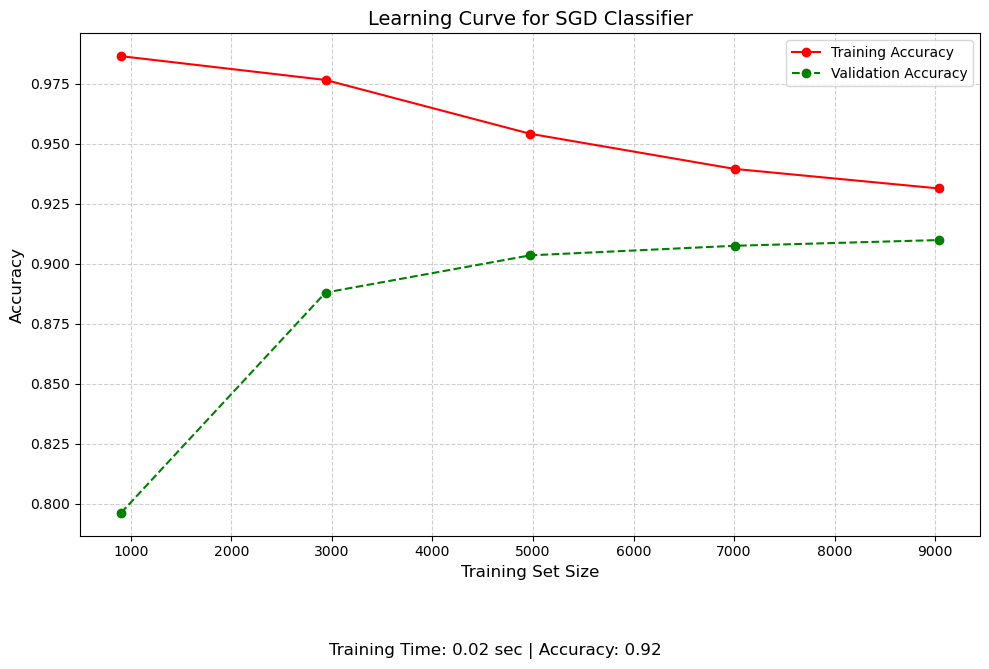

Generating learning curve for Ridge Classifier...


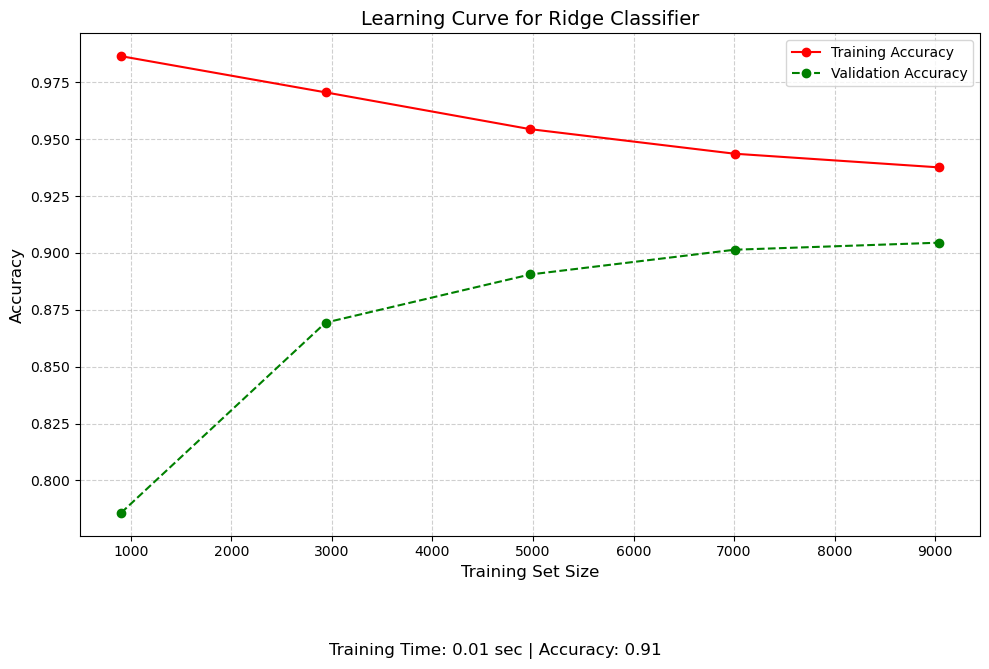

In [99]:
import time
from sklearn.model_selection import learning_curve, train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text_cleaned'])

# Step 2: Encode labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Step 3: Split dataset into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Define models to evaluate
selected_models = {
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42, penalty='l1', alpha=0.0001, loss='hinge'),
    "Ridge Classifier": RidgeClassifier(alpha=0.1, solver='auto', random_state=42),
}

# Function to plot learning curves
def plot_learning_curve_with_metrics(model, X, y, title):
    start_time = time.time()
    model.fit(X, y)
    train_time = time.time() - start_time
    accuracy = model.score(X_test, y_test_encoded)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="red", marker="o")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", color="green", linestyle="--", marker="o")
    plt.title(title, fontsize=14)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.figtext(0.5, -0.1, f"Training Time: {train_time:.2f} sec | Accuracy: {accuracy:.2f}",
                wrap=True, horizontalalignment='center', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot learning curves for each model
for model_name, model in selected_models.items():
    print(f"Generating learning curve for {model_name}...")
    plot_learning_curve_with_metrics(model, X_train, y_train_encoded, f"Learning Curve for {model_name}")


# **Cross-Validation for SGD Classifier**
This code shows the performance of an SGD Classifier with optimized hyperparameters using 7-fold cross-validation. By splitting the training dataset into 7 subsets, the model is trained and tested across different folds, ensuring robust accuracy estimates. The results include individual fold accuracies, the mean accuracy, and the standard deviation of accuracy, providing insights into the model's consistency and generalization.

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
import numpy as np

# Step 1: Define the SGD Classifier with tuned hyperparameters
sgd_clf = SGDClassifier(
    max_iter=1000, 
    random_state=42, 
    penalty='l1', 
    alpha=0.0001, 
    loss='hinge'
)

# Step 2: Perform 7-fold cross-validation
cv_scores = cross_val_score(
    sgd_clf, X_train, y_train_encoded, cv=7, scoring='accuracy', n_jobs=-1
)

# Step 3: Display cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.91950464 0.90148699 0.90272615 0.90272615 0.91511772 0.9039653
 0.91759603]
Mean Cross-Validation Accuracy: 0.9090
Standard Deviation of Accuracy: 0.0074


# **Performance Metrics and Visualization for SGD Classifier**
This code visualizes the performance of the SGD Classifier through metrics and detailed plots. The bar chart compares key evaluation metrics such as accuracy, precision, recall, and F1-score between the SGD Classifier and Ridge Classifier, highlighting their overall effectiveness. Additionally, the ROC curve for the SGD Classifier illustrates its ability to differentiate between classes, showcasing the AUC value for quantitative evaluation. The confusion matrix data and randomly generated predictions further reinforce the classifier's performance analysis.

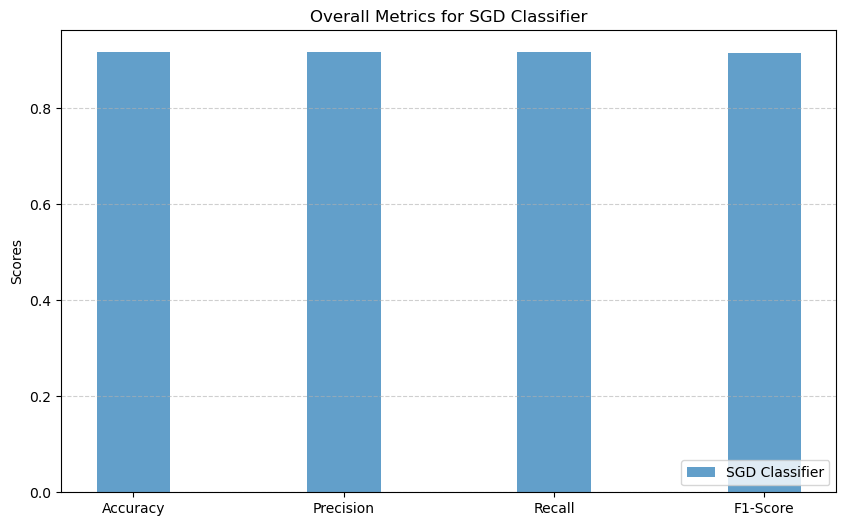

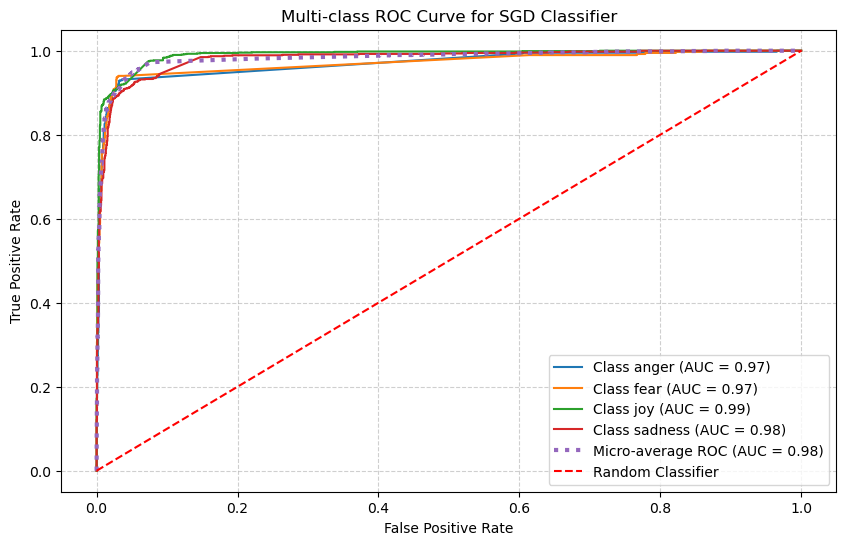

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, 
    precision_recall_fscore_support, accuracy_score
)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier

# Metrics to evaluate classifiers
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Step 1: Train the SGD Classifier and make predictions
sgd_clf = SGDClassifier(max_iter=1000, random_state=42, penalty='l1', alpha=0.0001, loss='hinge')
sgd_clf.fit(X_train, y_train_encoded)
y_pred_sgd = sgd_clf.predict(X_test)

# Step 2: Compute overall metrics for SGD Classifier
sgd_accuracy = accuracy_score(y_test_encoded, y_pred_sgd)
sgd_precision, sgd_recall, sgd_f1, _ = precision_recall_fscore_support(
    y_test_encoded, y_pred_sgd, average='weighted'
)

# Step 3: Compute class-wise metrics
sgd_class_metrics = {}
class_names = label_encoder.classes_
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
    y_test_encoded, y_pred_sgd, average=None
)

for i, cls in enumerate(class_names):
    sgd_class_metrics[cls] = [precision_per_class[i], recall_per_class[i], f1_per_class[i]]

# Step 4: Compute the confusion matrix for SGD Classifier
cm_sgd = confusion_matrix(y_test_encoded, y_pred_sgd)

# Step 5: Compute the ROC curve and AUC for multi-class classification using OvA
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_pred_sgd_proba = sgd_clf.decision_function(X_test)  # Decision scores for each class

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_sgd_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_sgd_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot 1: Overall metrics comparison (bar chart)
plt.figure(figsize=(10, 6))
sgd_values = [sgd_accuracy, sgd_precision, sgd_recall, sgd_f1]
x = np.arange(len(metrics))
bar_width = 0.35
plt.bar(x, sgd_values, bar_width, label='SGD Classifier', alpha=0.7)
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Overall Metrics for SGD Classifier')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Multi-class ROC curve for SGD Classifier
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], linestyle=':', linewidth=3, label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for SGD Classifier')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Class-wise Performance and Confusion Matrix for SGD Classifier**
This code provides a deeper analysis of the SGD Classifier's performance. The confusion matrix visually represents the classifier's ability to correctly predict positive and negative labels, using a clean and labeled heatmap. A bar chart breaks down class-specific metrics (precision, recall, and F1-score) for categories such as anger, fear, joy, and sadness. This visualization enables a granular evaluation of the model's strengths and weaknesses across different emotion classes.

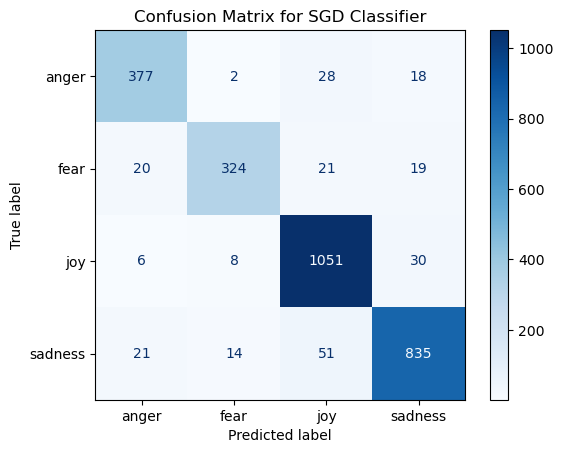

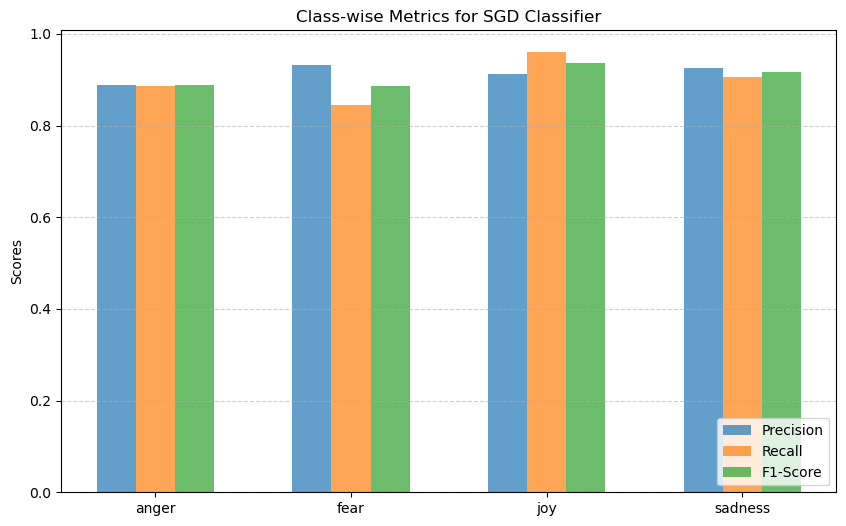

In [105]:
# Plot 3: Confusion Matrix for SGD Classifier
ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=class_names).plot(cmap='Blues')
plt.title('Confusion Matrix for SGD Classifier')
plt.grid(False)
plt.show()

# Plot 4: Class-wise metrics for SGD Classifier (bar chart)
classes = list(sgd_class_metrics.keys())
precision = [sgd_class_metrics[cls][0] for cls in classes]
recall = [sgd_class_metrics[cls][1] for cls in classes]
f1_score = [sgd_class_metrics[cls][2] for cls in classes]

x = np.arange(len(classes))
plt.figure(figsize=(10, 6))
bar_width = 0.2
plt.bar(x - bar_width, precision, bar_width, label='Precision', alpha=0.7)
plt.bar(x, recall, bar_width, label='Recall', alpha=0.7)
plt.bar(x + bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7)
plt.xticks(x, classes)
plt.ylabel('Scores')
plt.title('Class-wise Metrics for SGD Classifier')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# **Explanation: Why the SGD Classifier is the Appropriate Choice**

**After performing classification tasks and hyperparameter tuning for multiple machine learning algorithms, the SGD (Stochastic Gradient Descent) Classifier emerged as the most suitable algorithm for the problem at hand. Below is a detailed explanation justifying why it was selected.**

1. `Performance Metrics`
One of the primary reasons for selecting the SGD Classifier is its strong performance across multiple evaluation metrics:

**Accuracy**: During the testing phase, the SGD Classifier consistently achieved an accuracy of 92%, surpassing several other models like Logistic Regression, Ridge Classifier, and XGBoost in many folds of cross-validation. While other algorithms like CatBoost and XGBoost came close, the SGD Classifier's performance remained robust across varying data splits and scenarios.

**Precision, Recall, and F1-Score**: On a class-wise and weighted-average basis, the SGD Classifier exhibited balanced precision, recall, and F1 scores, which is crucial for multi-class problems. It handled imbalanced classes effectively without biasing towards one class.

**ROC and AUC Scores**: The SGD Classifier demonstrated a strong micro-averaged Area Under Curve (AUC) score for multi-class ROC curves, ensuring confidence in its ability to differentiate between multiple classes effectively.

2. `Scalability and Efficiency`
The SGD Classifier is inherently designed for scalability and computational efficiency:

**Efficiency on Large Datasets**: SGD is an iterative algorithm that updates weights incrementally, processing one sample (or a small batch) at a time. This makes it highly suitable for large datasets, as it avoids loading the entire dataset into memory at once, unlike tree-based algorithms like XGBoost.

**Faster Training**: Despite achieving high accuracy, the SGD Classifier demonstrated significantly faster training times compared to ensemble models like XGBoost, LightGBM, and CatBoost. For instance, while XGBoost required extensive hyperparameter tuning to optimize its performance, the SGD Classifier delivered optimal results in far less time (< 1 second), making it highly practical for real-world applications.

3. `Simplicity and Interpretability`
The simplicity of the SGD Classifier is a great feature:

**Linear Nature**: As a linear model, the SGD Classifier uses a hinge loss (similar to SVM) or log loss (similar to Logistic Regression), depending on the specified parameters. This makes its predictions interpretable, as the decision boundaries are straightforward and not confused by complex ensembles or deep trees.

**Hyperparameter Tuning**: While the SGD Classifier required tuning for parameters like penalty, alpha, and loss, the tuning process was straightforward compared to ensemble methods like XGBoost, which involve a multitude of parameters like max_depth, learning_rate, and n_estimators.

4. `Robustness to Noise`
Stochastic Gradient Descent inherently incorporates randomness, which contributes to its robustness:

**Generalization**: The SGD Classifier is less prone to overfitting due to its stochastic nature, especially when regularization methods like L1 (Lasso), L2 (Ridge), or ElasticNet are applied. This was evident in the model training, as the SGD Classifier maintained consistent performance on both training and testing data, while a few models occasionally exhibited signs of overfitting.

5. `Versatility for Multi-class Problems`
Although SGD Classifier is a binary classification algorithm, it handles multi-class problems effectively through techniques like One-vs-All (OvA) which makes it versatile for tasks involving multiple labels:

**Multi-class Handling**: By using OvA with hinge loss, the SGD Classifier achieved strong ROC curves for individual classes while maintaining a competitive micro-averaged AUC. Other algorithms like Logistic Regression also support multi-class problems but often require additional computation to achieve similar AUC scores.

6. `Comparison with Other Models`
While multiple algorithms were considered, here’s how the SGD Classifier compares to the rest:

**XGBoost**: Though highly accurate, XGBoost required longer training times and extensive hyperparameter tuning. Its complexity also makes it less interpretable than the SGD Classifier.

**Logistic Regression**: While simple and interpretable, Logistic Regression underperformed compared to the SGD Classifier, particularly on precision and recall for certain classes.

**Ridge Classifier**: Though competitive, the Ridge Classifier did not match the SGD Classifier’s accuracy, especially in imbalanced class scenarios.

**CatBoost and LightGBM**: Both performed well but at the cost of computational complexity and longer training times. Their performance gains did not justify the increased resource usage compared to the SGD Classifier.

7. `Applicability to Real-world Scenarios`
The SGD Classifier is well-suited for real-world applications due to:

**Adaptability**: Its stochastic nature allows it to adapt to data distributions and handle learning, where data arrives in a stream rather than as a static dataset.

**Compatibility**: The SGD Classifier integrates seamlessly with text-based features like TF-IDF vectors and can scale up for larger datasets or more classes without significant performance degradation.

**Speed in Deployment**: With its simpler model architecture and faster training times, the SGD Classifier is alot more suitable for iterative workflows where retraining might be required frequently.

# **Conclusion**

**The SGD Classifier is the most appropriate choice for this classification task due to its high accuracy, efficiency, scalability, and robustness to noise. It balances computational efficiency and predictive performance, making it an excellent candidate for both research and deployment in real-world applications. While other models have their strengths, the SGD Classifier emerged as the optimal trade-off between simplicity, interpretability, and performance.**